In [2]:
import os  #finds our current directory path

In [2]:
#set some variables
STRUCTURE= ['RS','TSA']

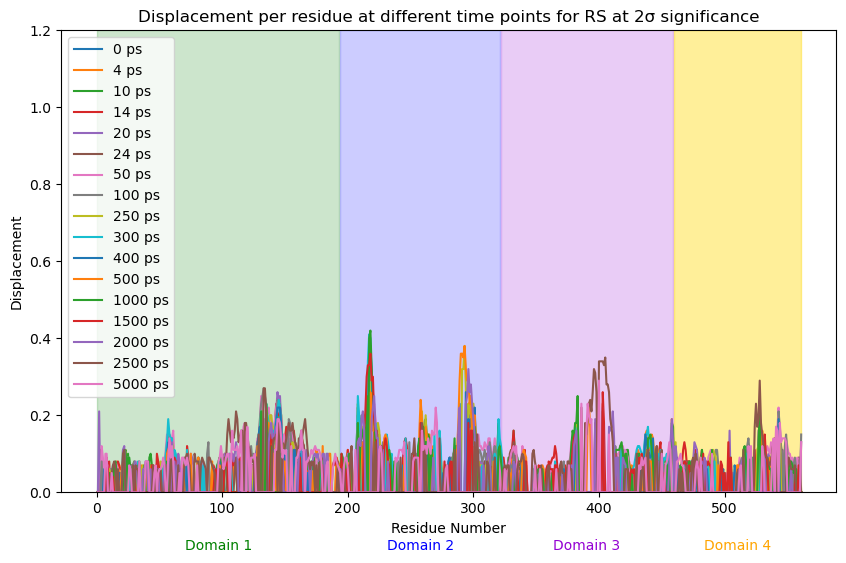

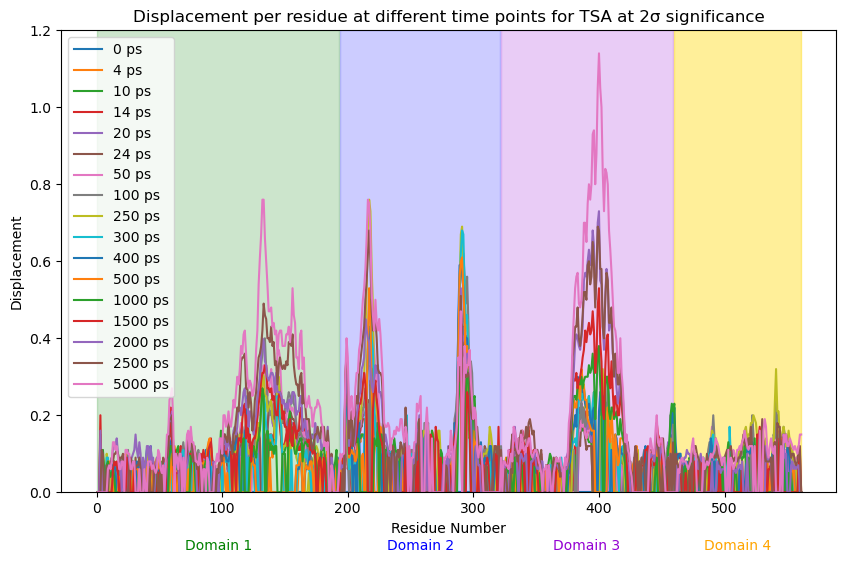

In [ ]:
# 2 sig DNEMD - old version
import matplotlib.pyplot as plt
STRUCTURE= ['RS','TSA']

def plot_b_factors(output_dir, file_range):
    plt.figure(figsize=(10, 6))
    
    for i in file_range:
        output_pdb = os.path.join(output_dir, f"{structure}_vec_norm_2sig_{i}.pdb") 

        residues = []
        b_factors = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith("ATOM") or line.startswith("HETATM"):
                    res_num = int(line[22:26])  # Extract residue number
                    b_factor = float(line[60:66])  # Extract B-factor
                    residues.append(res_num)
                    b_factors.append(b_factor)
        time_point= i*2   # Frame number times 2 as we saved every 2 ps
        plt.plot(residues, b_factors, label=f"{time_point} ps")
    
    plt.xlabel("Residue Number")
    plt.ylabel("Displacement")
    plt.ylim(0, 1.2)
    plt.title(f"Displacement per residue at different time points for {structure} at 2σ significance")
    plt.text(97, -0.15, 'Domain 1', ha='center', fontsize=10, color='green')
    plt.text(258, -0.15, 'Domain 2', ha='center', fontsize=10, color='blue')
    plt.text(390, -0.15, 'Domain 3', ha='center', fontsize=10, color='darkviolet')
    plt.text(510, -0.15, 'Domain 4', ha='center', fontsize=10, color='orange')
    plt.axvspan(0, 193, alpha=0.2, color='green')
    plt.axvspan(194, 321, alpha=0.2, color='blue')
    plt.axvspan(322, 459, alpha=0.2, color='darkviolet')
    plt.axvspan(460, 561, alpha=0.4, color='gold')
    plt.legend()
    plt.show()

ps_time_steps=[0, 2, 5, 7, 10, 12, 25, 50, 125, 150, 200, 250, 500, 750, 1000, 1250, 2500]

for structure in STRUCTURE:
    plot_b_factors(f"/user/work/zn22275/dnemd_vec_{structure}", ps_time_steps)

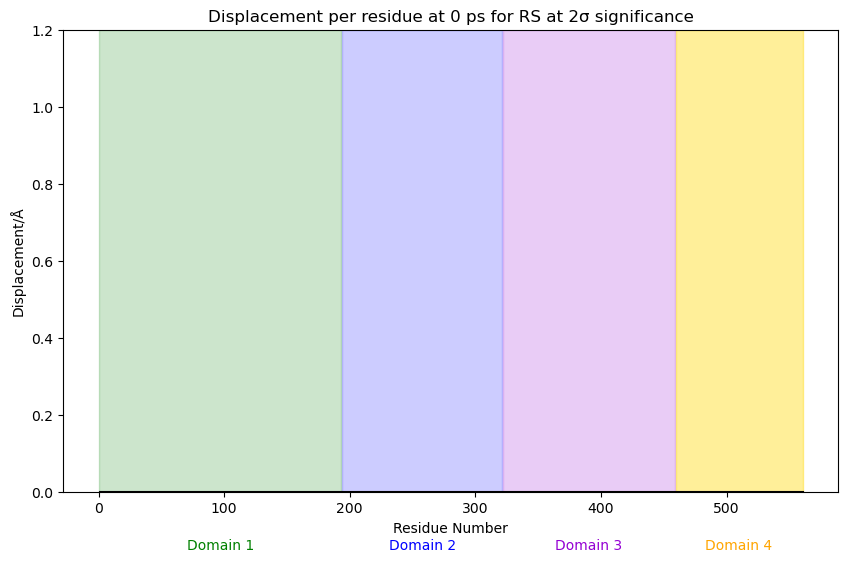

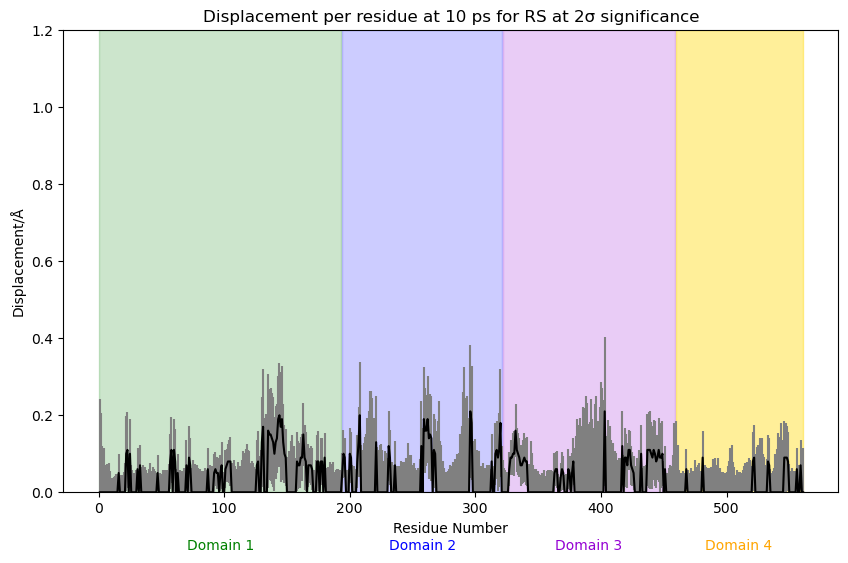

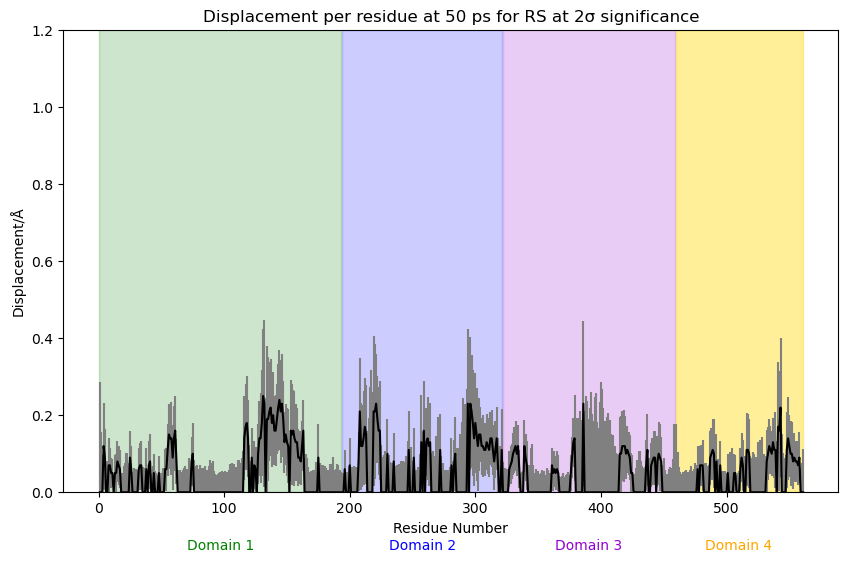

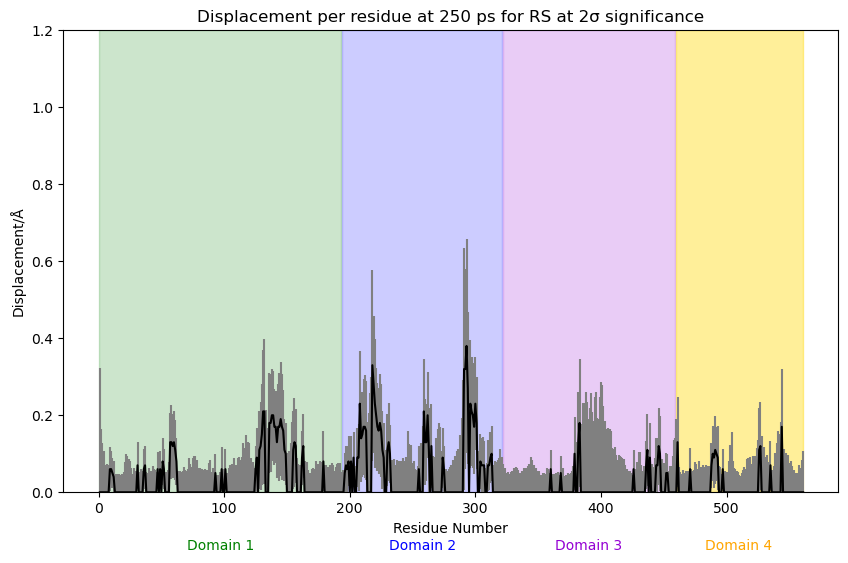

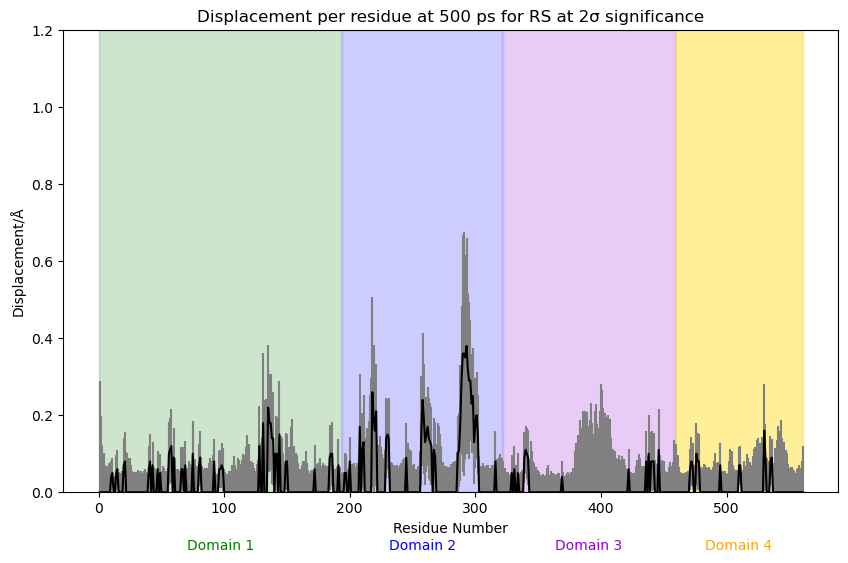

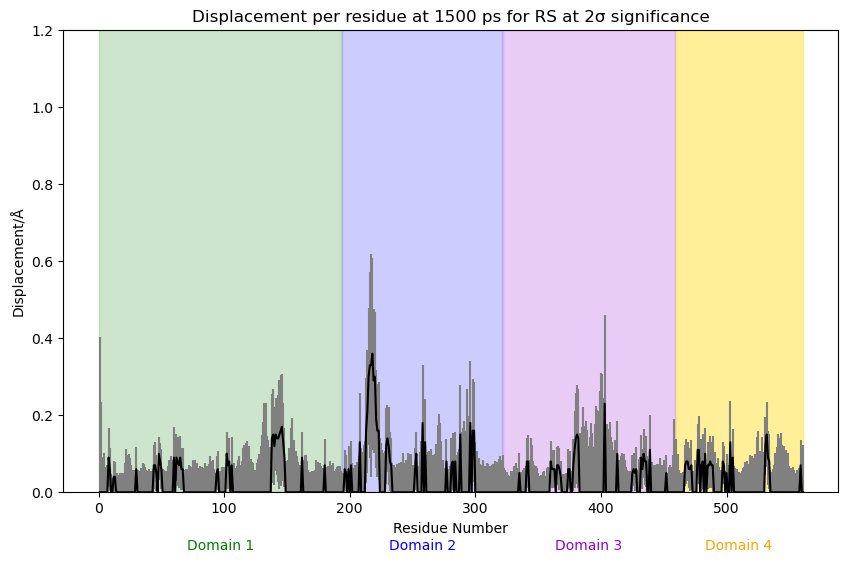

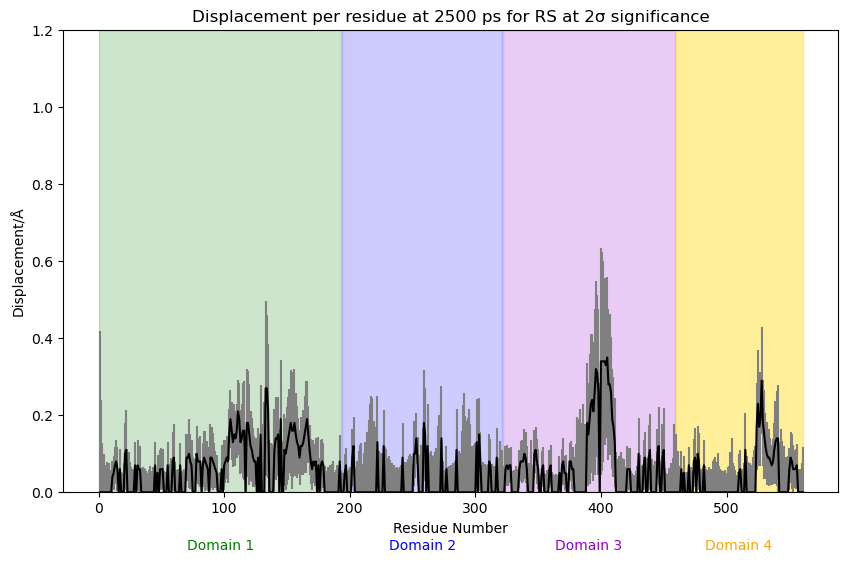

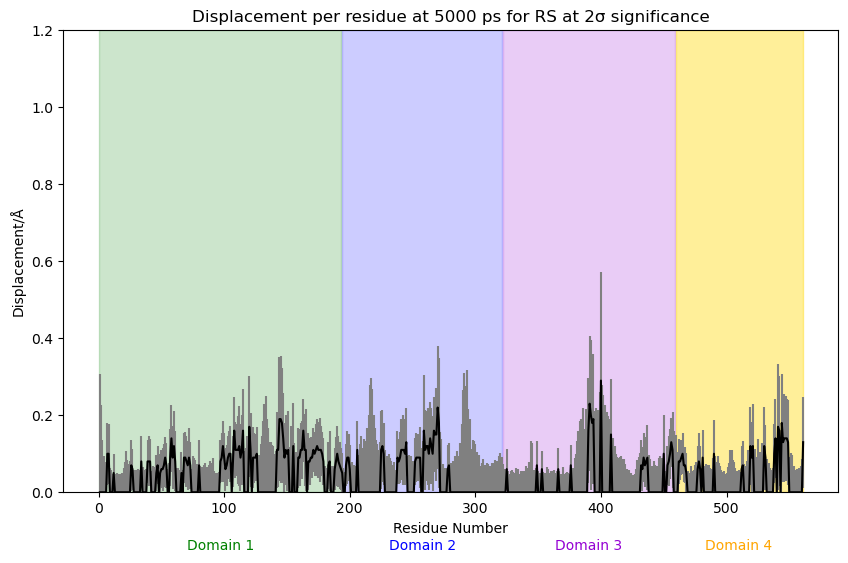

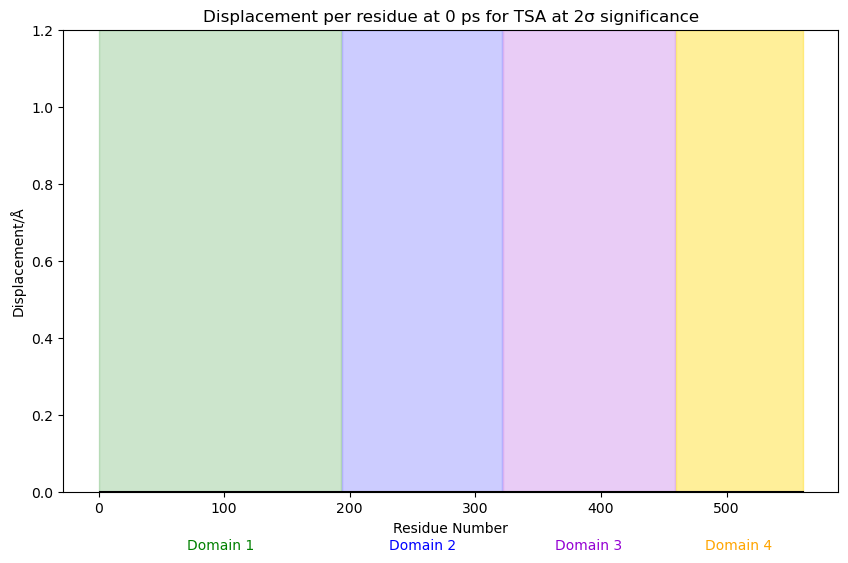

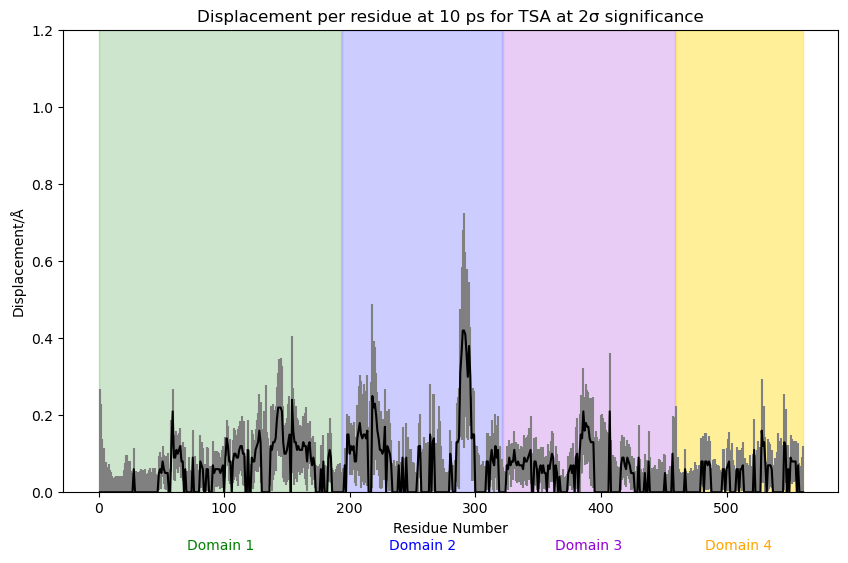

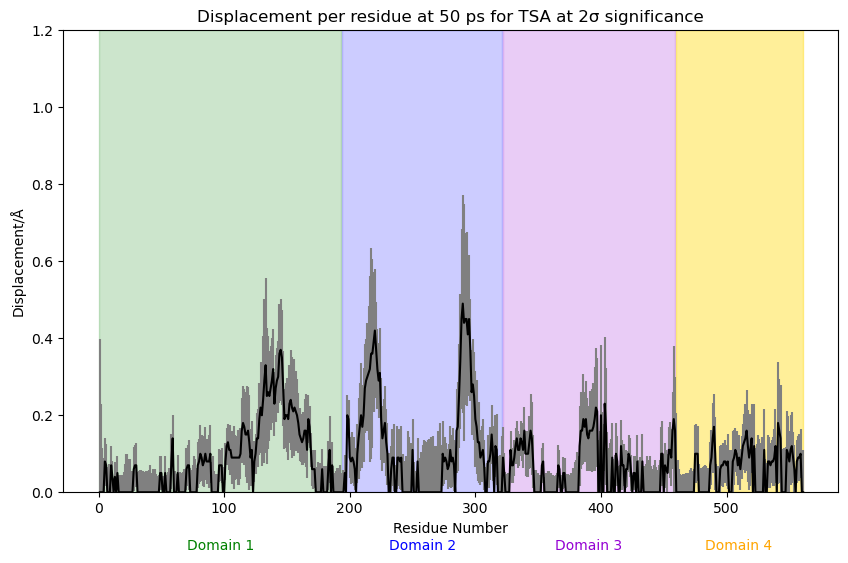

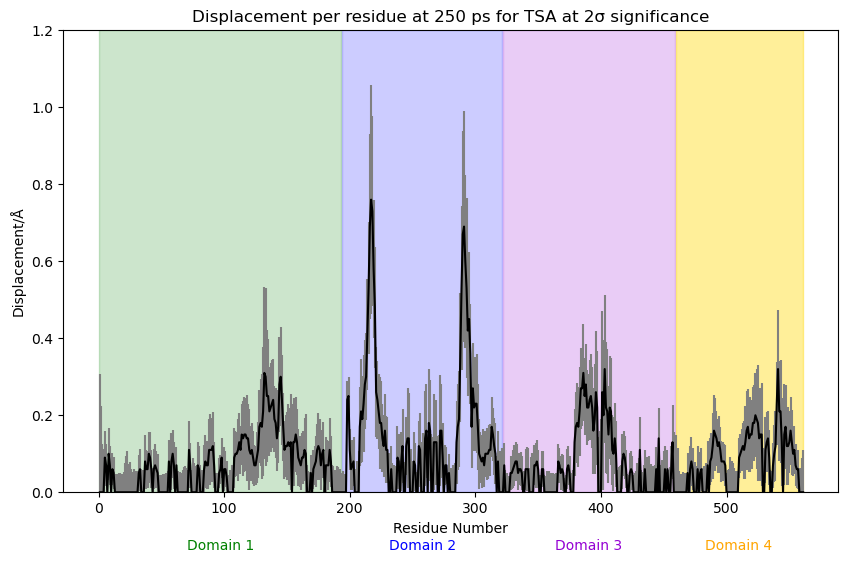

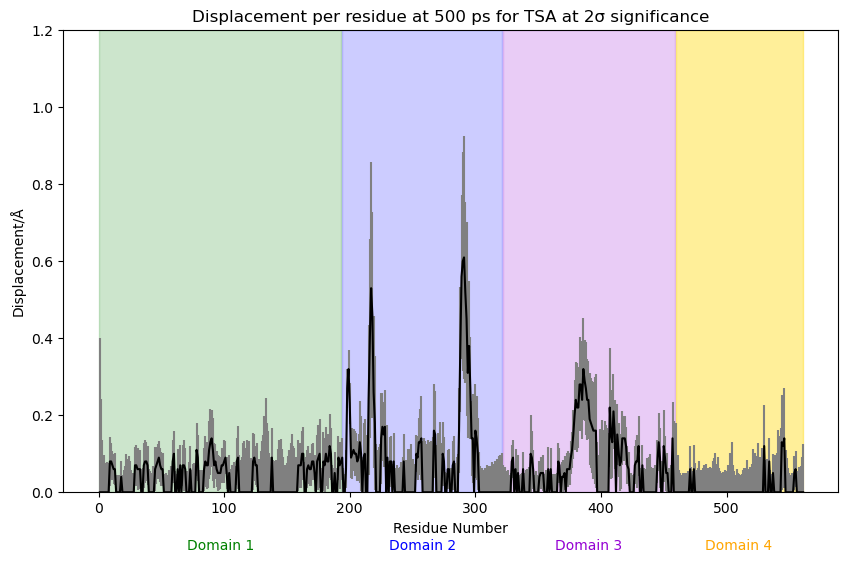

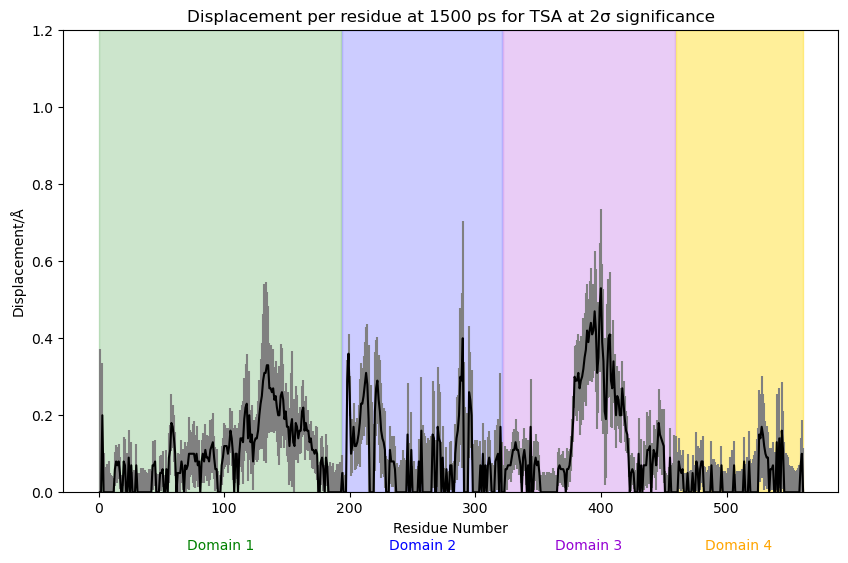

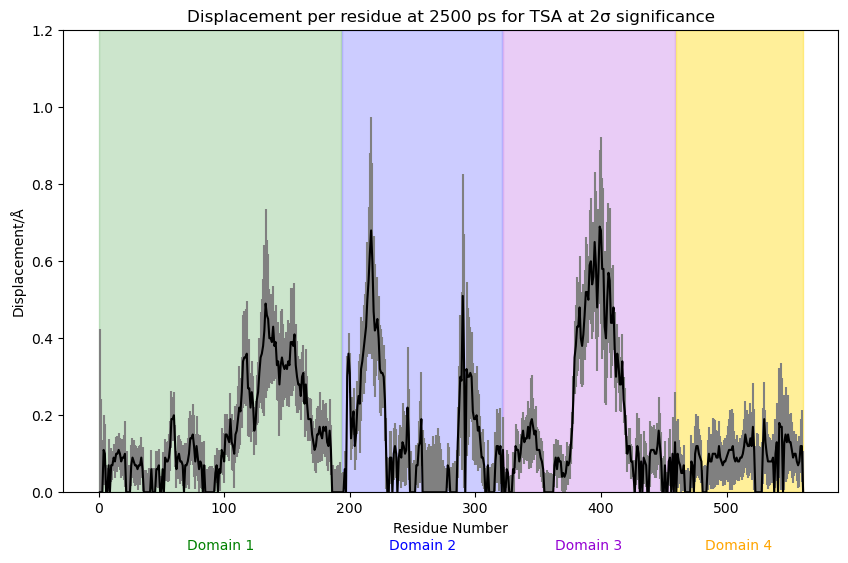

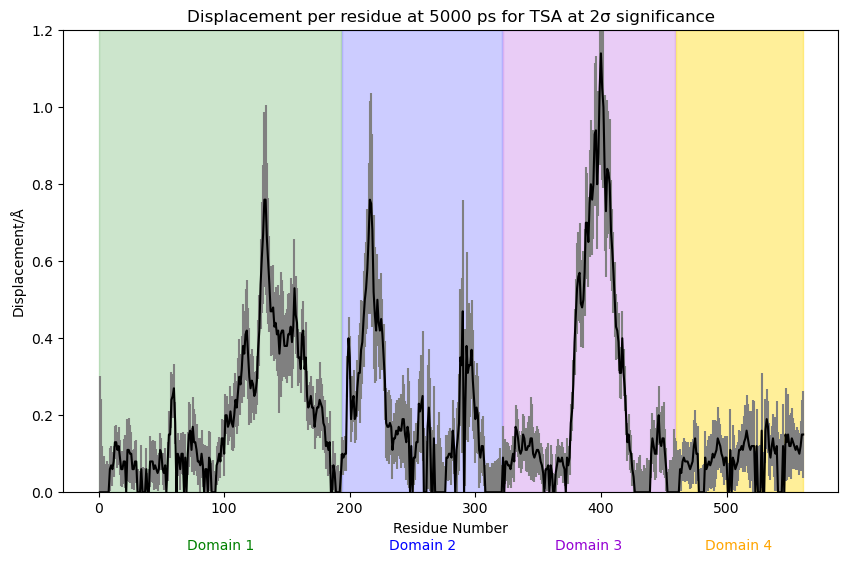

In [ ]:
# 2 sig DNEMD individual plots
import matplotlib.pyplot as plt

STRUCTURE= ['RS','TSA']
TIME_STEPS =[0, 5, 25, 125, 250, 750, 1250, 2500]

def plot_b_factors(output_dir, error_file, file_range):
    plt.figure(figsize=(10, 6))
    
    for i in file_range:
        output_pdb = os.path.join(output_dir, f"{structure}_vec_norm_2sig_{i}.pdb") 
        error_file = os.path.join(error_file, f"{structure}_vec_norm_stats_2sig_{i}.txt") 
        residues = []
        b_factors = []
        errors = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith("ATOM") or line.startswith("HETATM"):
                    res_num = int(line[22:26])  # Extract residue number
                    b_factor = float(line[60:66])  # Extract B-factor
                    residues.append(res_num)
                    b_factors.append(b_factor)

        with open(error_file, 'r') as f:
            for line in f:
                if line.startswith(" "):
                    error_2s = float(line[162:168])
                    errors.append(error_2s)
        time_point= i*2   # Frame number times 2 as we saved every 2 ps
        # plt.plot(residues, b_factors, color = 'black', label=f"{time_point} ps")
        plt.errorbar(residues, b_factors, yerr=errors, fmt='-k', ecolor='grey', label=f"{time_point} ps")

    
    plt.xlabel("Residue Number")
    plt.ylabel("Displacement/Å")
    plt.ylim(0, 1.2)
    plt.title(f"Displacement per residue at {time_point} ps for {structure} at 2σ significance")
    plt.text(97, -0.15, 'Domain 1', ha='center', fontsize=10, color='green')
    plt.text(258, -0.15, 'Domain 2', ha='center', fontsize=10, color='blue')
    plt.text(390, -0.15, 'Domain 3', ha='center', fontsize=10, color='darkviolet')
    plt.text(510, -0.15, 'Domain 4', ha='center', fontsize=10, color='orange')
    plt.axvspan(0, 193, alpha=0.2, color='green')
    plt.axvspan(194, 321, alpha=0.2, color='blue')
    plt.axvspan(322, 459, alpha=0.2, color='darkviolet')
    plt.axvspan(460, 561, alpha=0.4, color='gold')
    # plt.legend()
    plt.show()

# ps_time_steps=[0, 2, 5, 7, 10, 12, 25, 50, 125, 150, 200, 250, 500, 750, 1000, 1250, 2500]

for structure in STRUCTURE:
    for time in TIME_STEPS:
        plot_b_factors(f"/user/work/zn22275/dnemd_vec_{structure}", f"/user/work/zn22275/dnemd_vec_{structure}/dnemd_stats", {time})

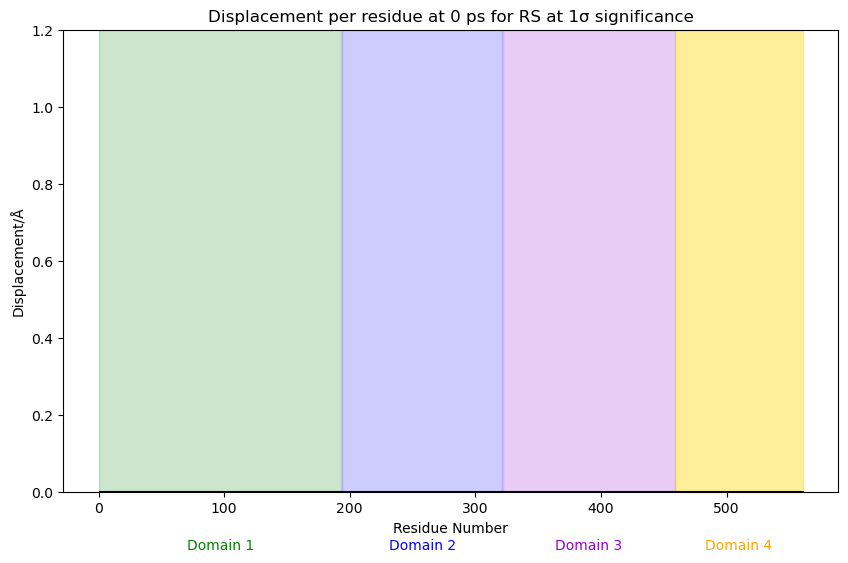

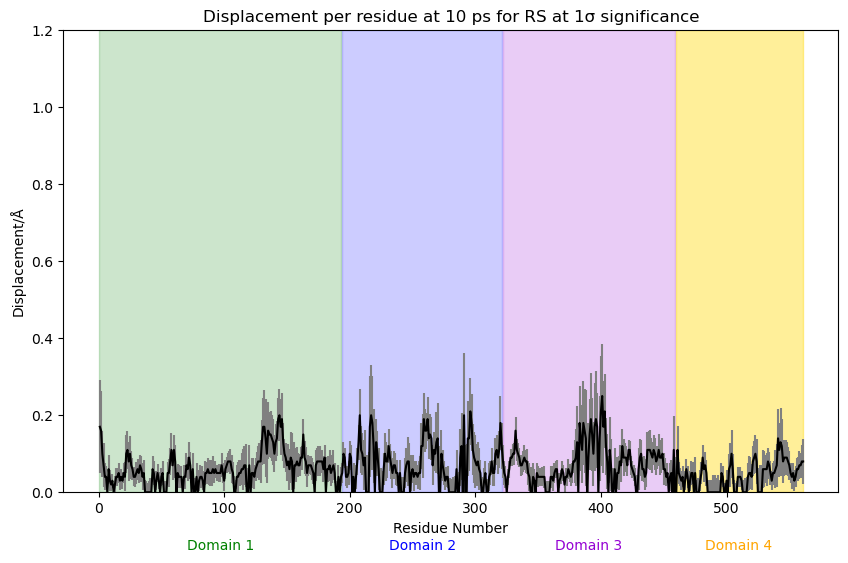

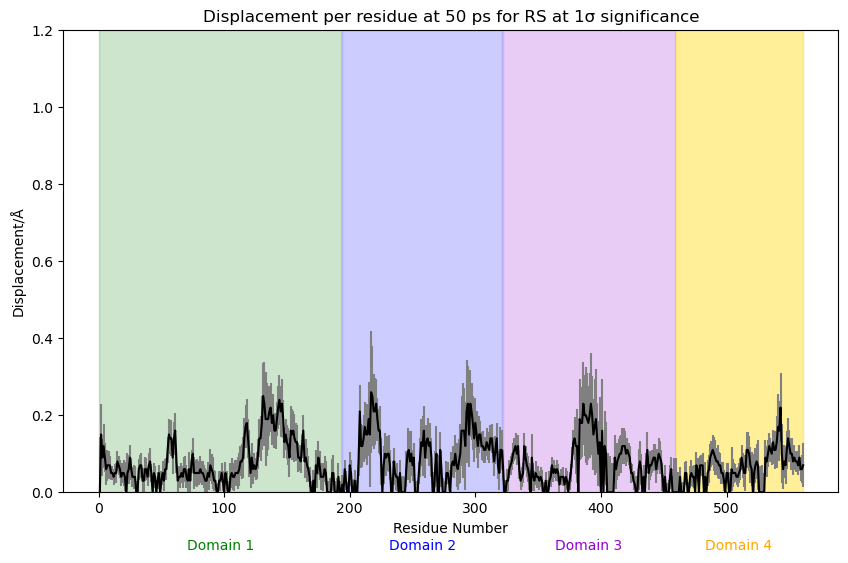

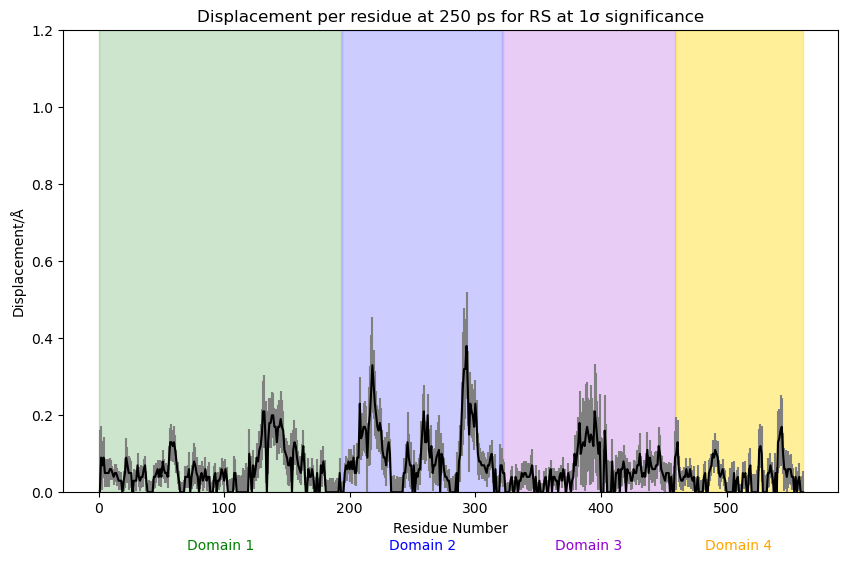

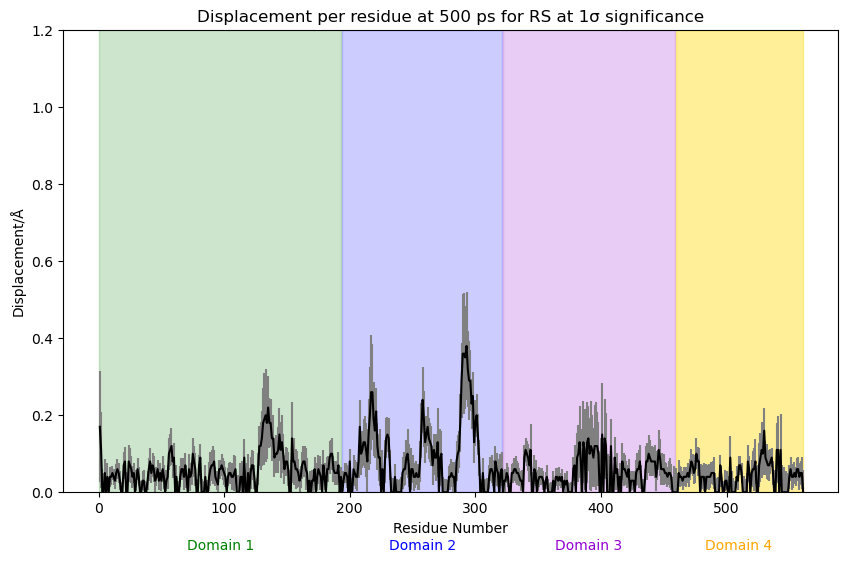

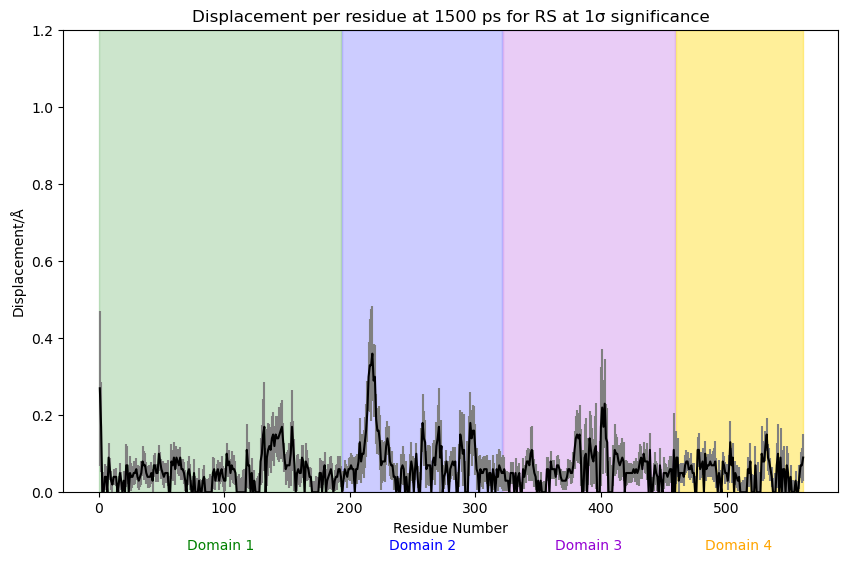

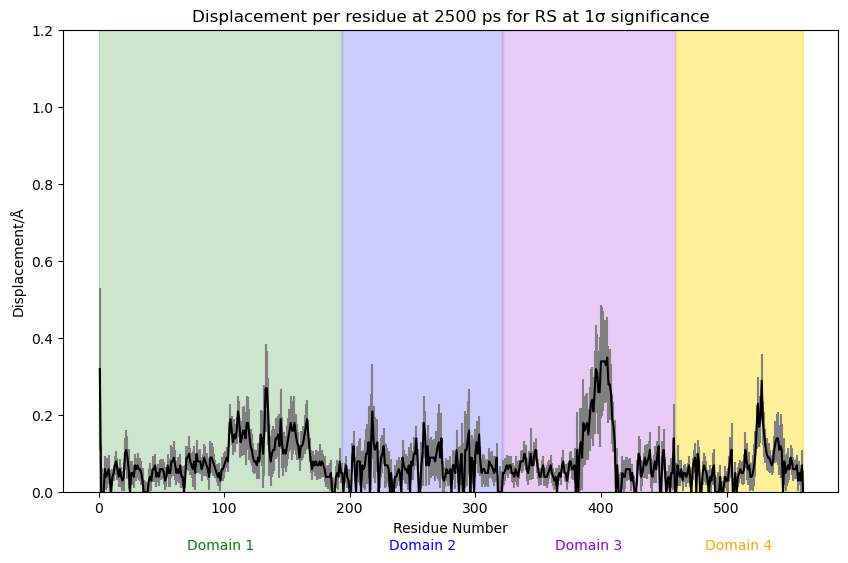

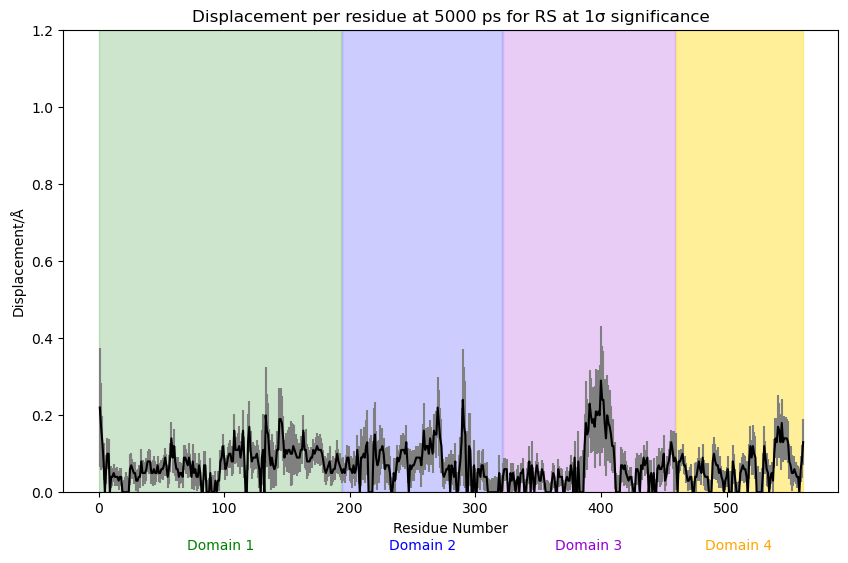

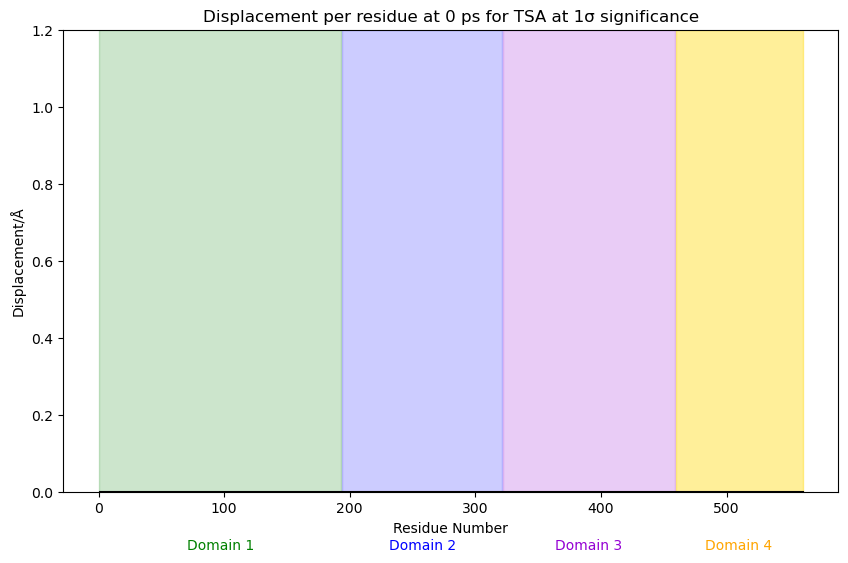

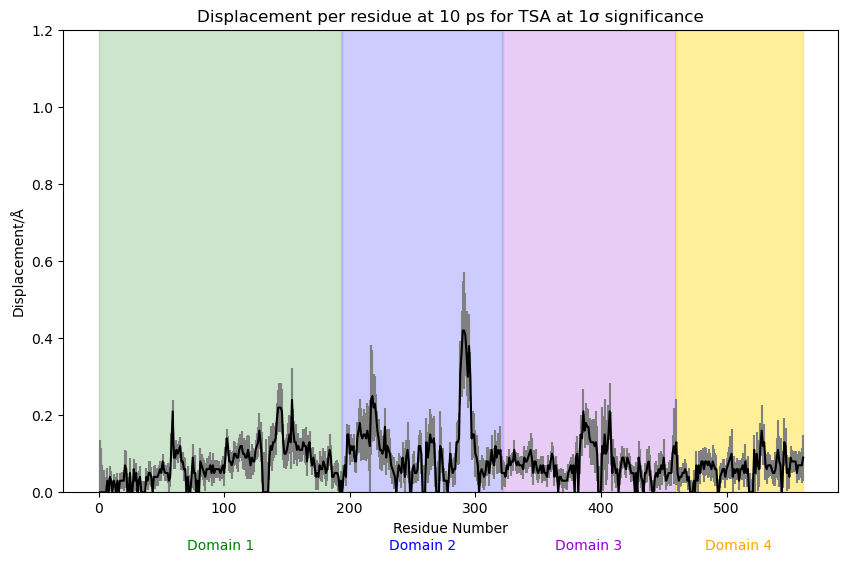

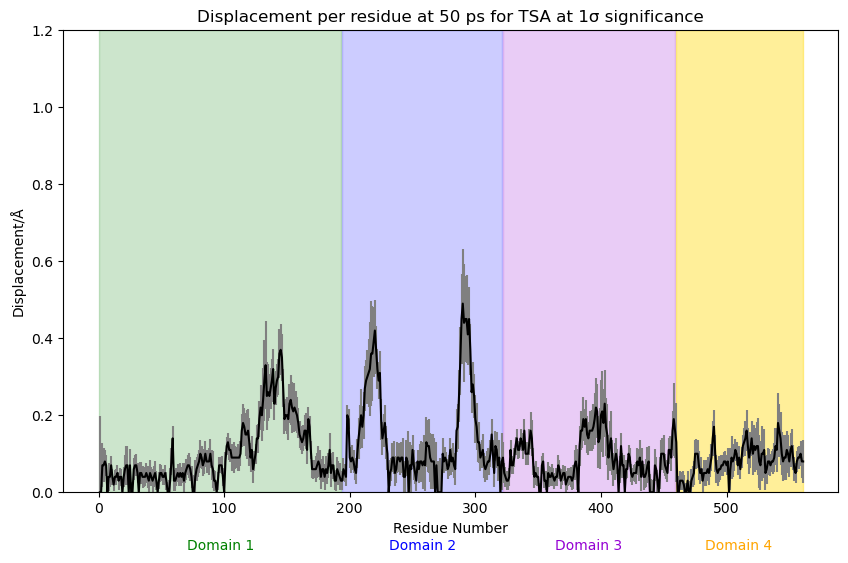

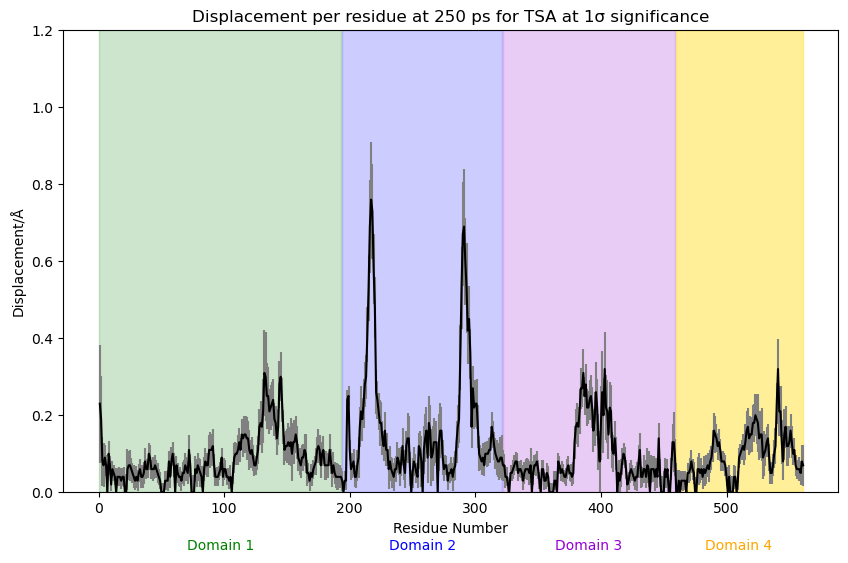

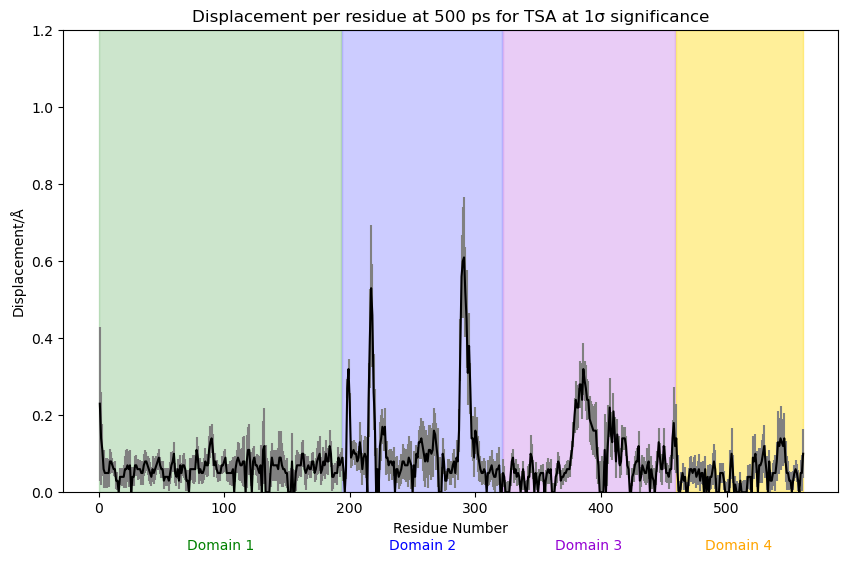

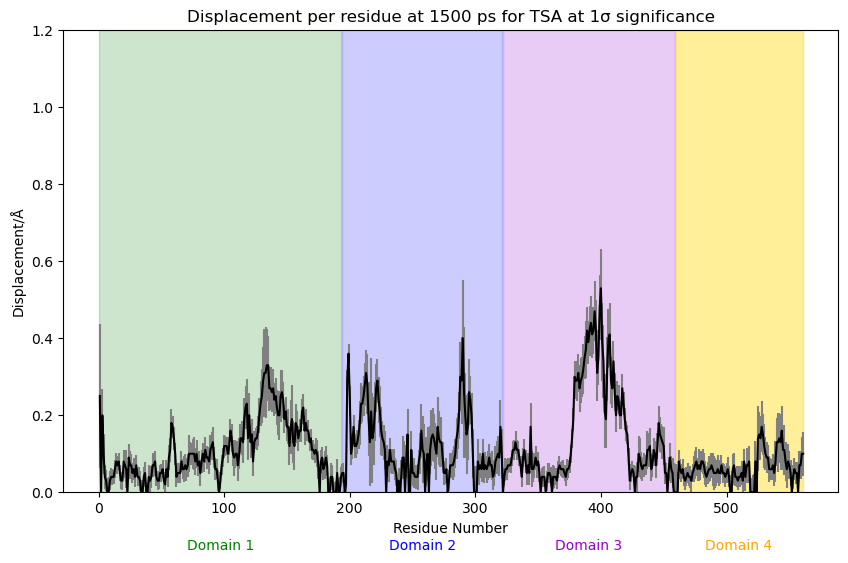

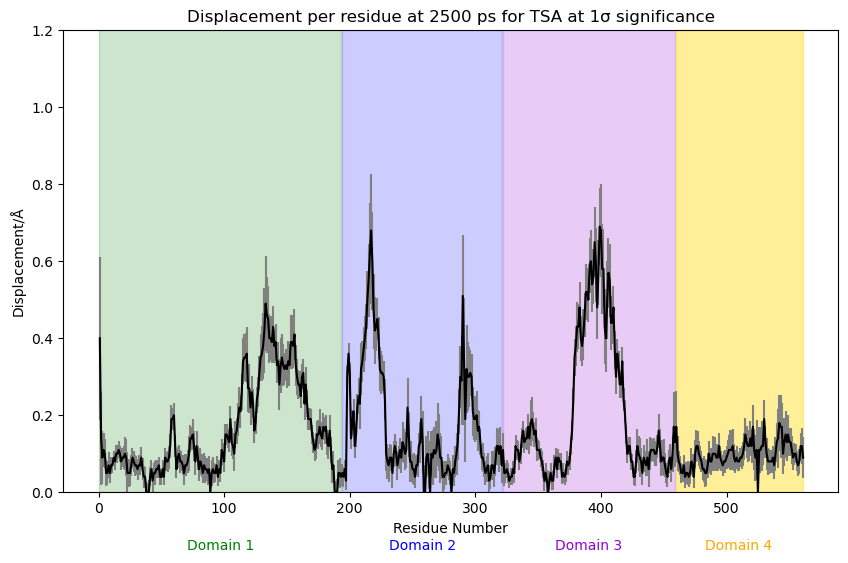

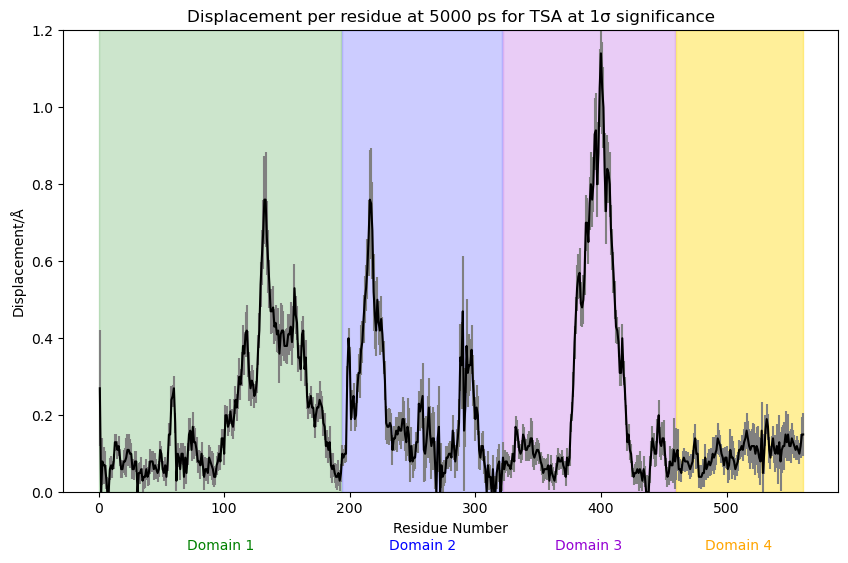

In [ ]:
# 1 sig DNEMD individual plots
import matplotlib.pyplot as plt

STRUCTURE= ['RS','TSA']
TIME_STEPS =[0, 5, 25, 125, 250, 750, 1250, 2500]

def plot_b_factors(output_dir, error_file, file_range):
    plt.figure(figsize=(10, 6))
    
    for i in file_range:
        output_pdb = os.path.join(output_dir, f"{structure}_vec_norm_1sig_{i}.pdb") 
        error_file = os.path.join(error_file, f"{structure}_vec_norm_stats_1sig_{i}.txt") 
        residues = []
        b_factors = []
        errors = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith("ATOM") or line.startswith("HETATM"):
                    res_num = int(line[22:26])  # Extract residue number
                    b_factor = float(line[60:66])  # Extract B-factor
                    residues.append(res_num)
                    b_factors.append(b_factor)

        with open(error_file, 'r') as f:
            for line in f:
                if line.startswith(" "):
                    error_1s = float(line[116:123])
                    errors.append(error_1s)
        time_point= i*2   # Frame number times 2 as we saved every 2 ps
        # plt.plot(residues, b_factors, color = 'black', label=f"{time_point} ps")
        plt.errorbar(residues, b_factors, yerr=errors, fmt='-k', ecolor='grey', label=f"{time_point} ps")

    
    plt.xlabel("Residue Number")
    plt.ylabel("Displacement/Å")
    plt.ylim(0, 1.2)
    plt.title(f"Displacement per residue at {time_point} ps for {structure} at 1σ significance")
    plt.text(97, -0.15, 'Domain 1', ha='center', fontsize=10, color='green')
    plt.text(258, -0.15, 'Domain 2', ha='center', fontsize=10, color='blue')
    plt.text(390, -0.15, 'Domain 3', ha='center', fontsize=10, color='darkviolet')
    plt.text(510, -0.15, 'Domain 4', ha='center', fontsize=10, color='orange')
    plt.axvspan(0, 193, alpha=0.2, color='green')
    plt.axvspan(194, 321, alpha=0.2, color='blue')
    plt.axvspan(322, 459, alpha=0.2, color='darkviolet')
    plt.axvspan(460, 561, alpha=0.4, color='gold')
    # plt.legend()
    plt.show()

# ps_time_steps=[0, 2, 5, 7, 10, 12, 25, 50, 125, 150, 200, 250, 500, 750, 1000, 1250, 2500]

for structure in STRUCTURE:
    for time in TIME_STEPS:
        plot_b_factors(f"/user/work/zn22275/dnemd_vec_{structure}/1_sig", f"/user/work/zn22275/dnemd_vec_{structure}/1_sig/dnemd_stats", {time})

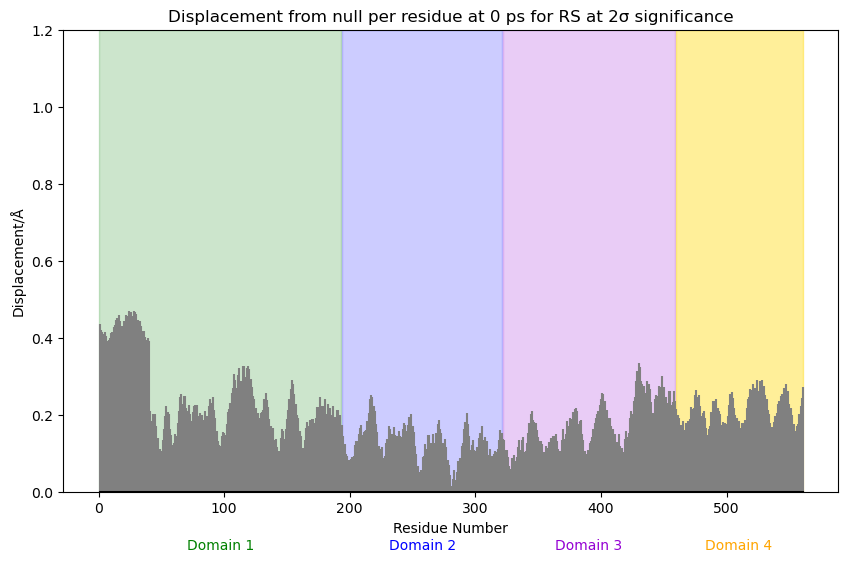

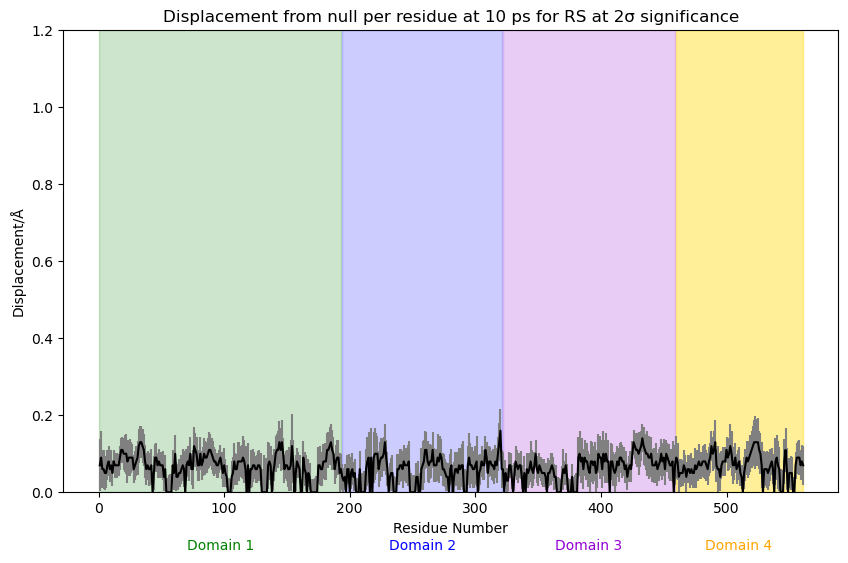

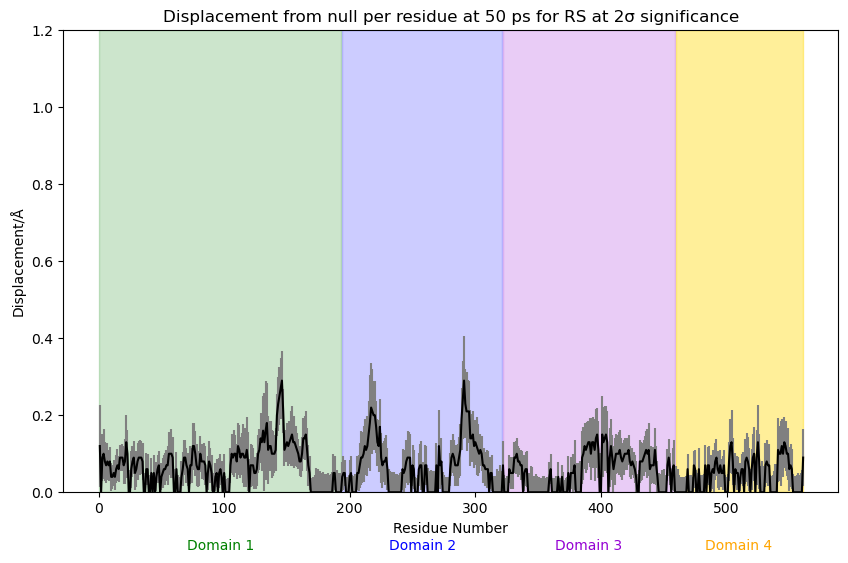

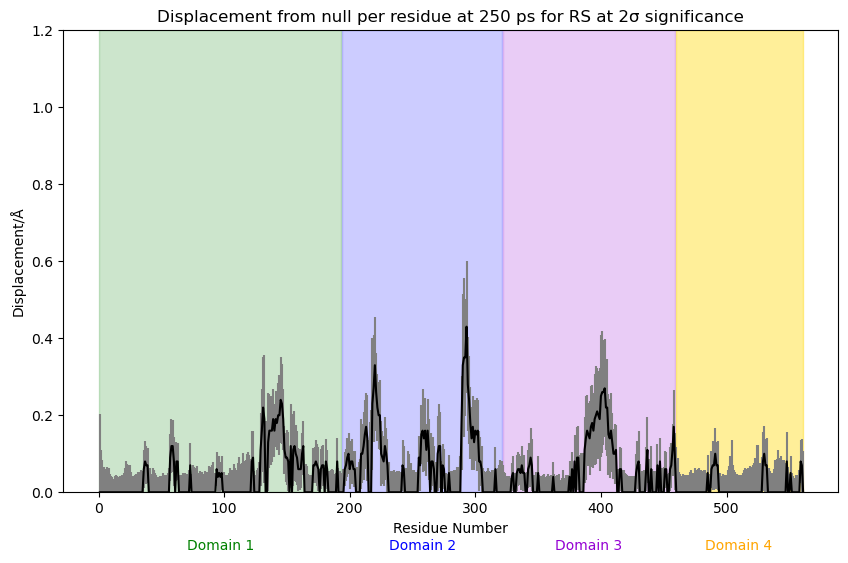

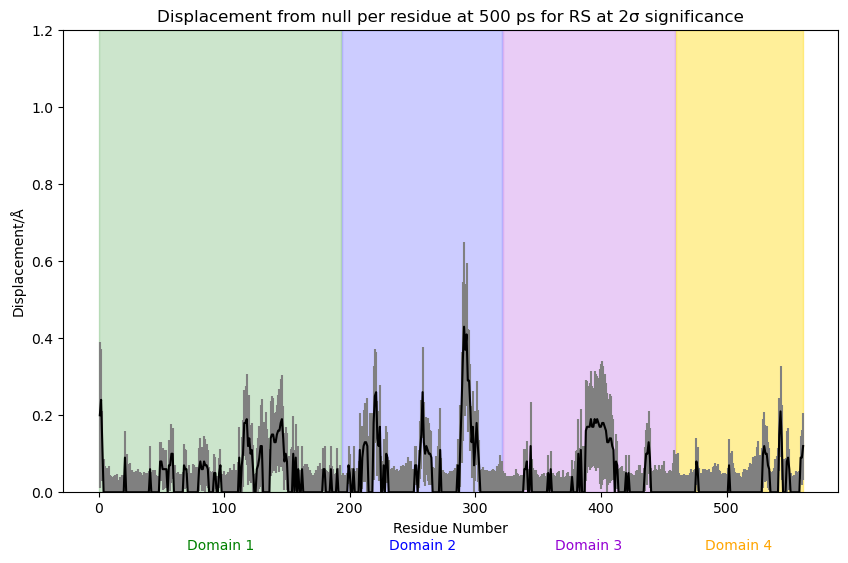

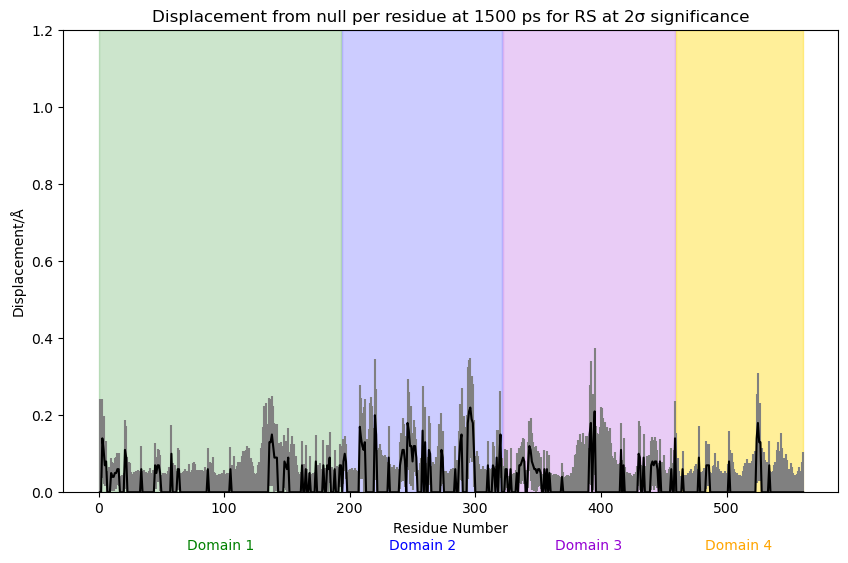

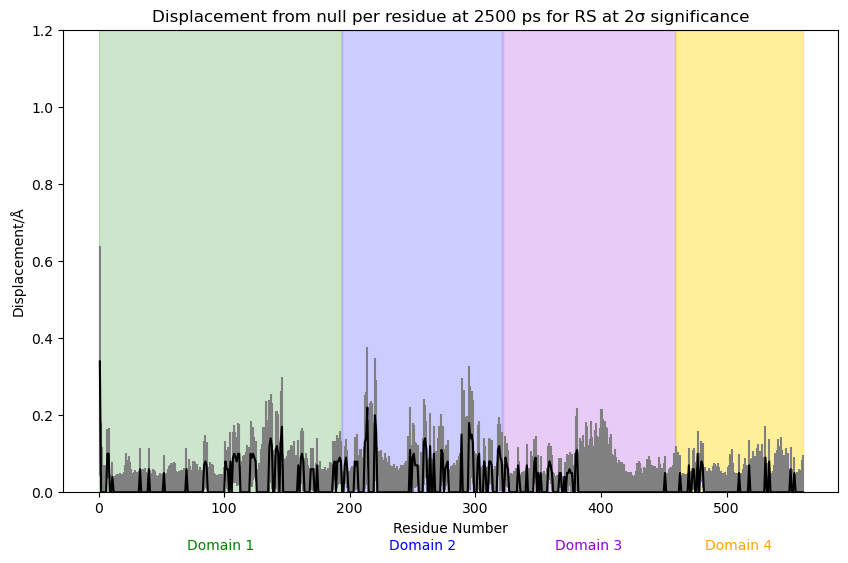

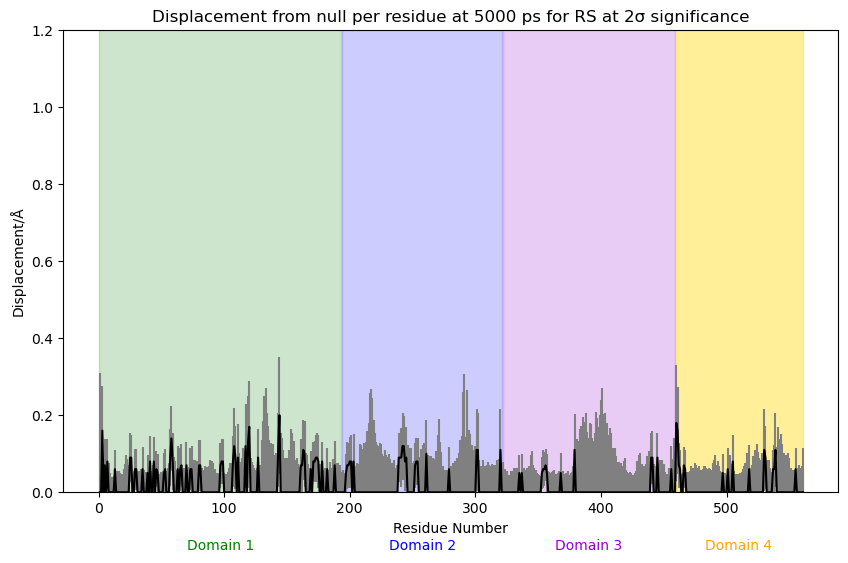

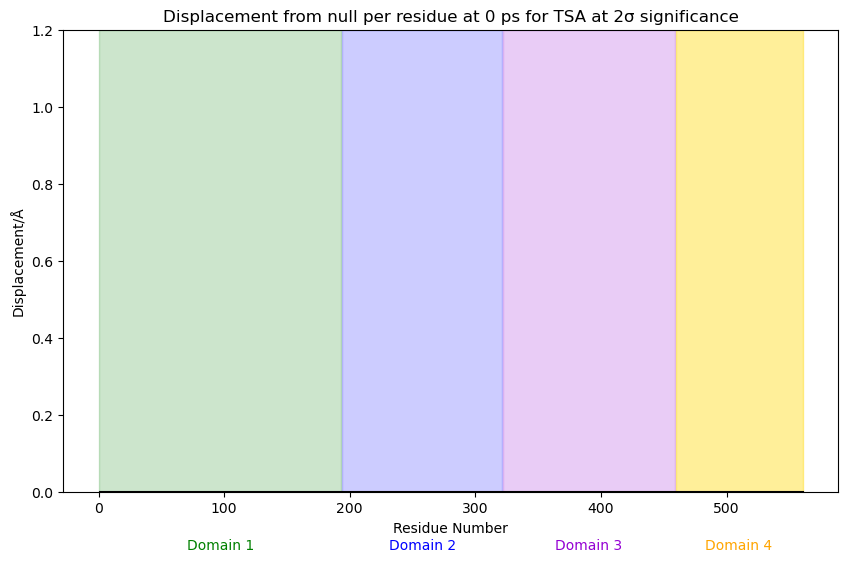

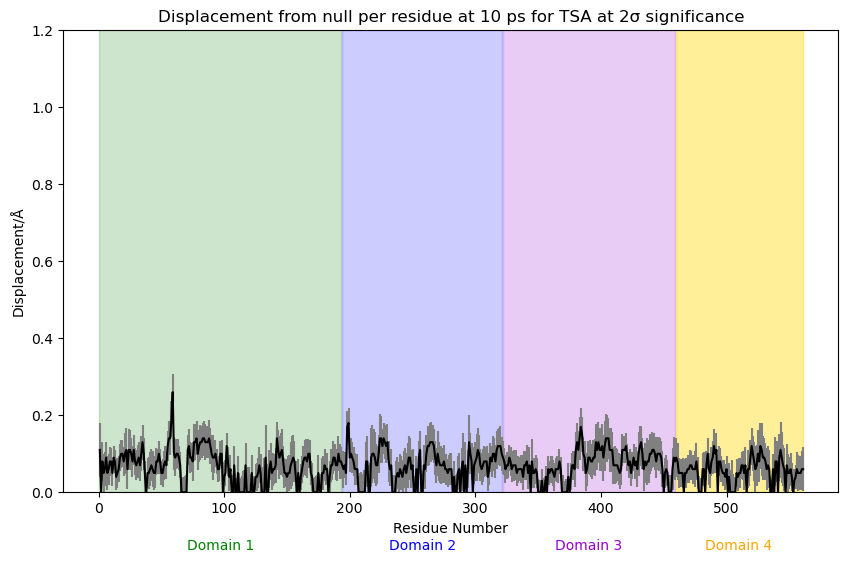

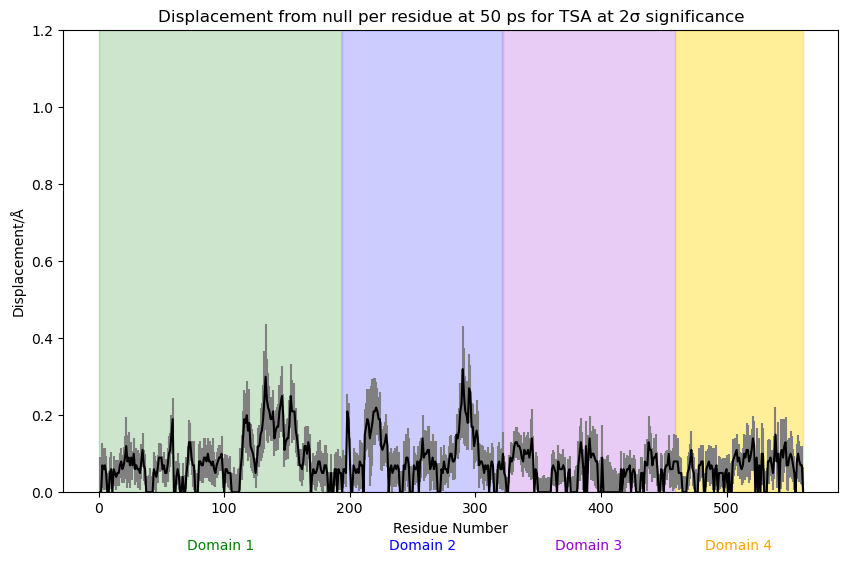

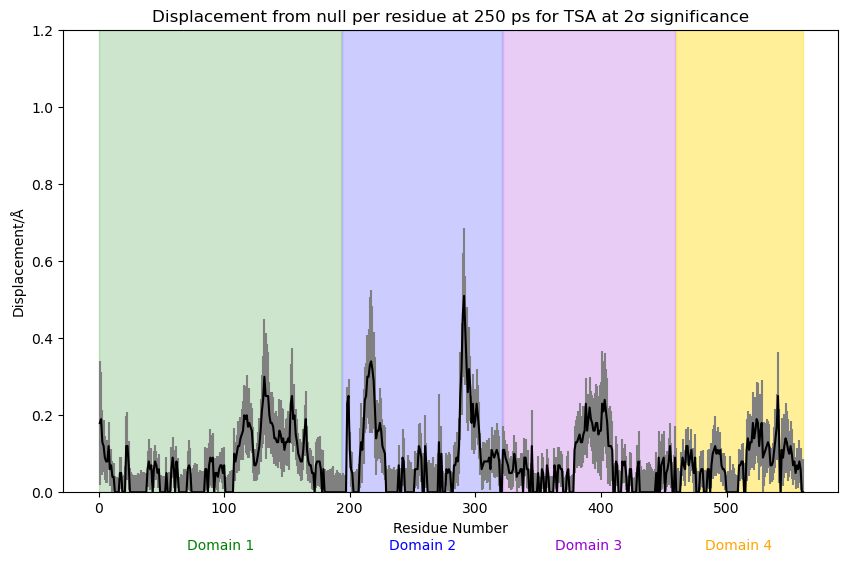

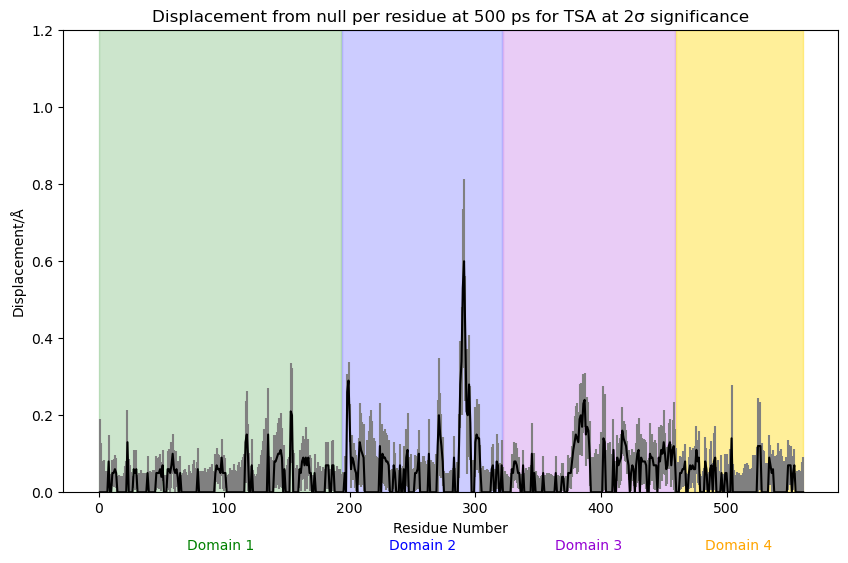

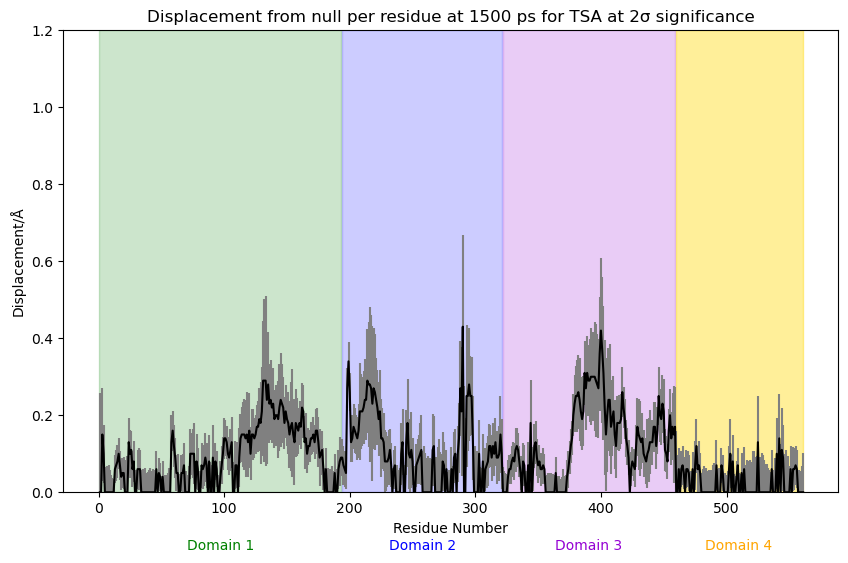

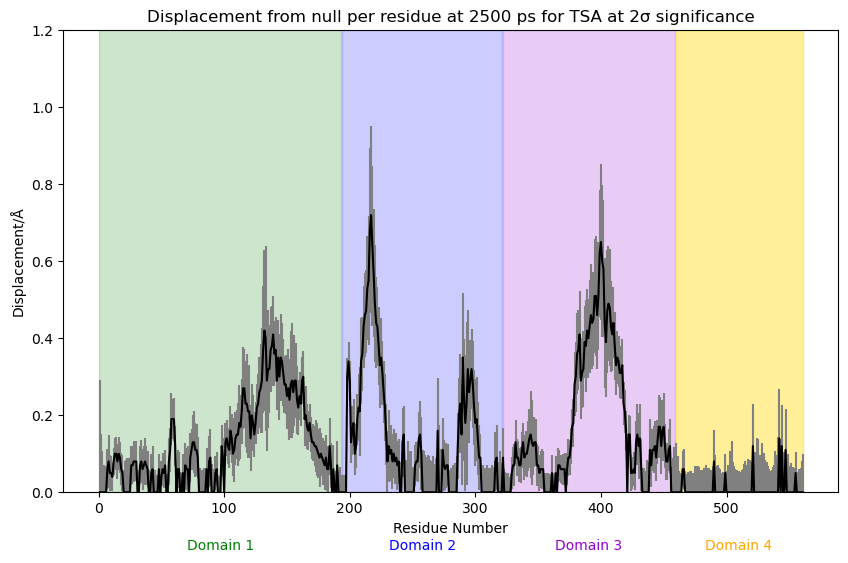

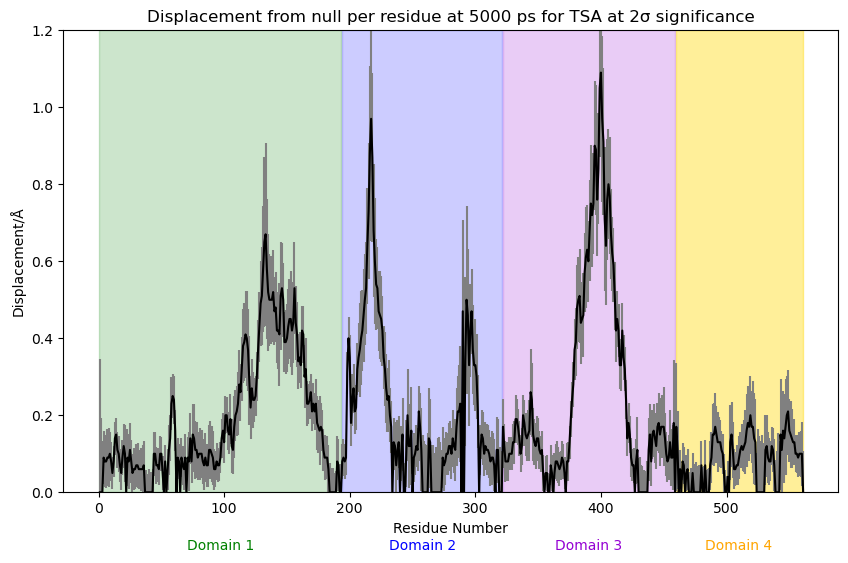

In [ ]:
# 2 sig null-dnemd individual plots
import matplotlib.pyplot as plt

STRUCTURE= ['RS','TSA']
TIME_STEPS =[0, 5, 25, 125, 250, 750, 1250, 2500]

def plot_b_factors(output_dir, error_file, file_range):
    plt.figure(figsize=(10, 6))
    
    for i in file_range:
        output_pdb = os.path.join(output_dir, f"vec_norm_{i}.pdb") 
        error_file = os.path.join(error_file, f"vec_norm_stats_2sig_{i}.txt") 
        residues = []
        b_factors = []
        errors = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith("ATOM") or line.startswith("HETATM"):
                    res_num = int(line[22:26])  # Extract residue number
                    b_factor = float(line[60:66])  # Extract B-factor
                    residues.append(res_num)
                    b_factors.append(b_factor)

        with open(error_file, 'r') as f:
            for line in f:
                if line.startswith(" "):
                    error_2s = float(line[80:87])
                    errors.append(error_2s)
        time_point= i*2   # Frame number times 2 as we saved every 2 ps
        # plt.plot(residues, b_factors, color = 'black', label=f"{time_point} ps")
        plt.errorbar(residues, b_factors, yerr=errors, fmt='-k', ecolor='grey', label=f"{time_point} ps")

    
    plt.xlabel("Residue Number")
    plt.ylabel("Displacement/Å")
    plt.ylim(0, 1.2)
    plt.title(f"Displacement from null per residue at {time_point} ps for {structure} at 2σ significance")
    plt.text(97, -0.15, 'Domain 1', ha='center', fontsize=10, color='green')
    plt.text(258, -0.15, 'Domain 2', ha='center', fontsize=10, color='blue')
    plt.text(390, -0.15, 'Domain 3', ha='center', fontsize=10, color='darkviolet')
    plt.text(510, -0.15, 'Domain 4', ha='center', fontsize=10, color='orange')
    plt.axvspan(0, 193, alpha=0.2, color='green')
    plt.axvspan(194, 321, alpha=0.2, color='blue')
    plt.axvspan(322, 459, alpha=0.2, color='darkviolet')
    plt.axvspan(460, 561, alpha=0.4, color='gold')
    # plt.legend()
    plt.show()

# ps_time_steps=[0, 2, 5, 7, 10, 12, 25, 50, 125, 150, 200, 250, 500, 750, 1000, 1250, 2500]

for structure in STRUCTURE:
    for time in TIME_STEPS:
        plot_b_factors(f"/user/work/zn22275/vec_space_{structure}", f"/user/work/zn22275/vec_space_{structure}/stats", {time})

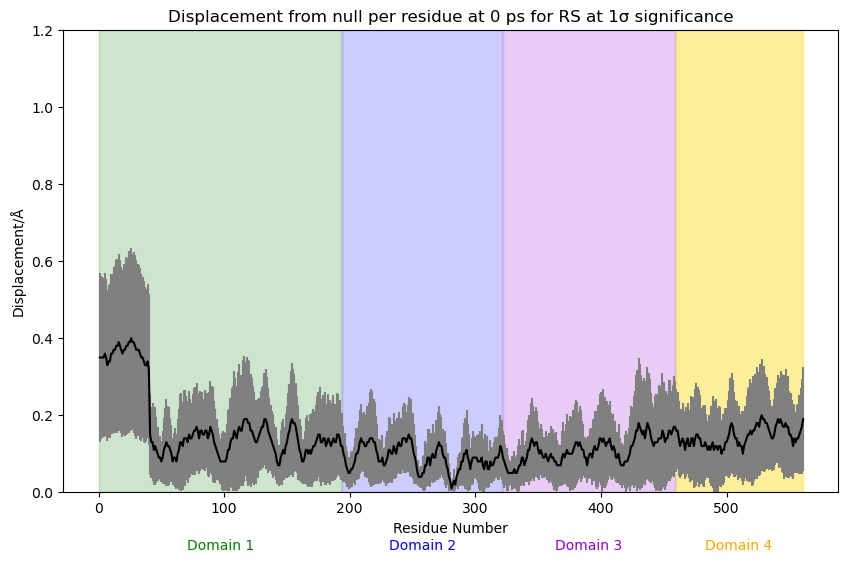

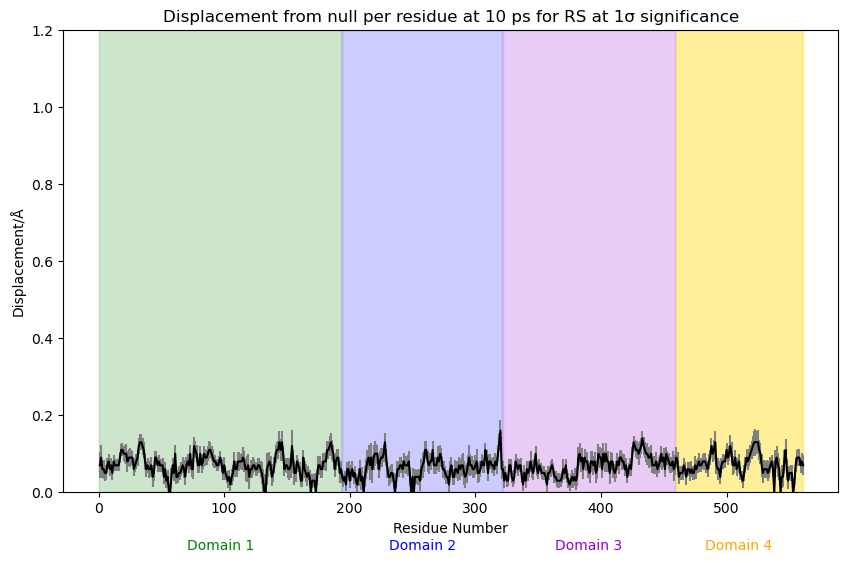

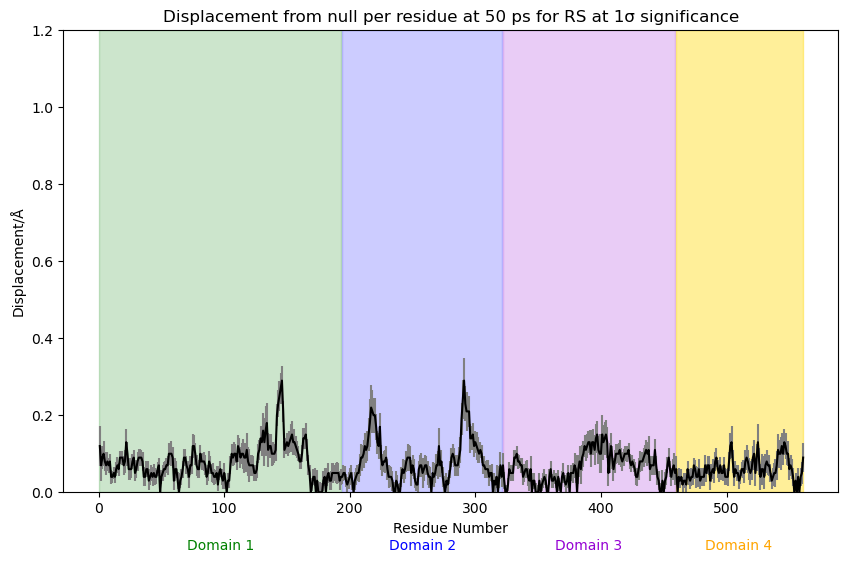

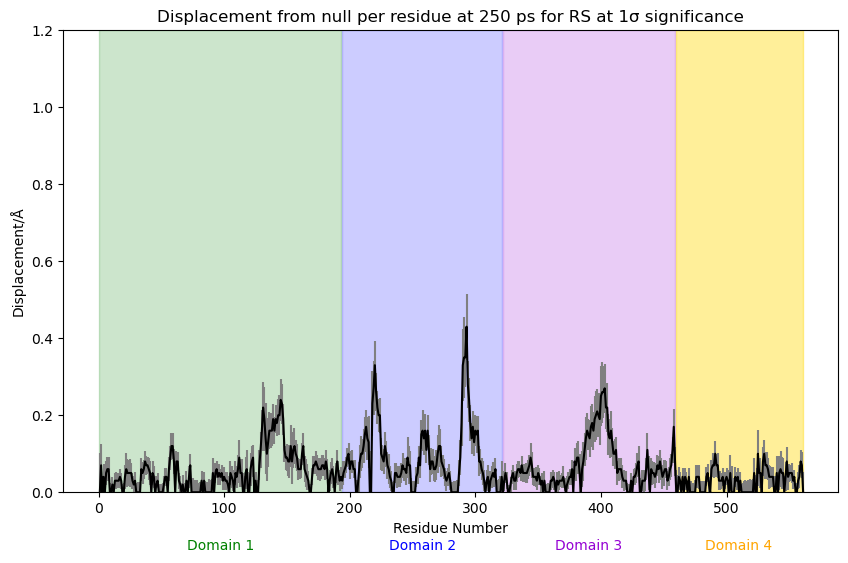

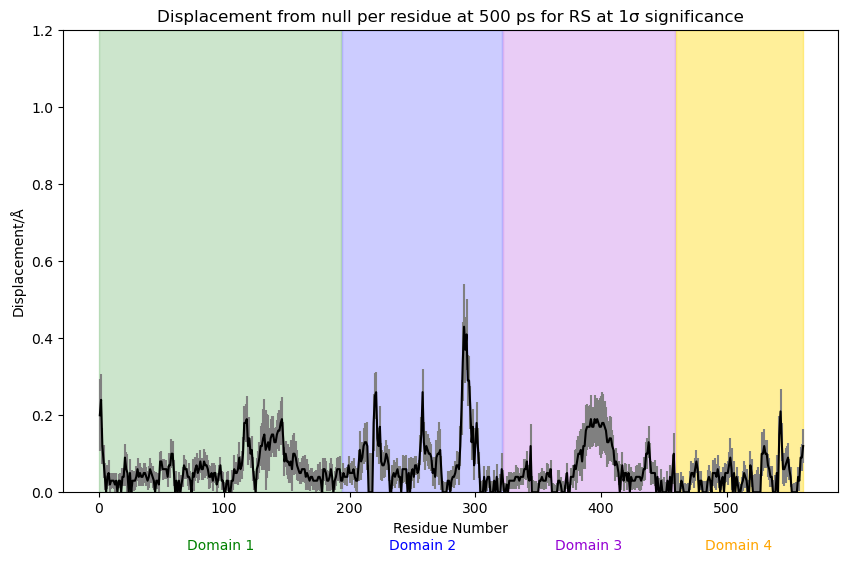

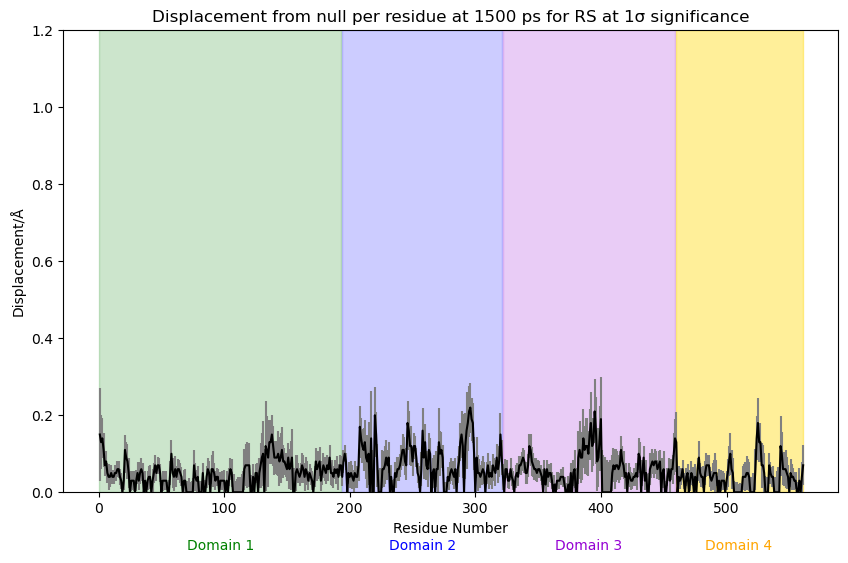

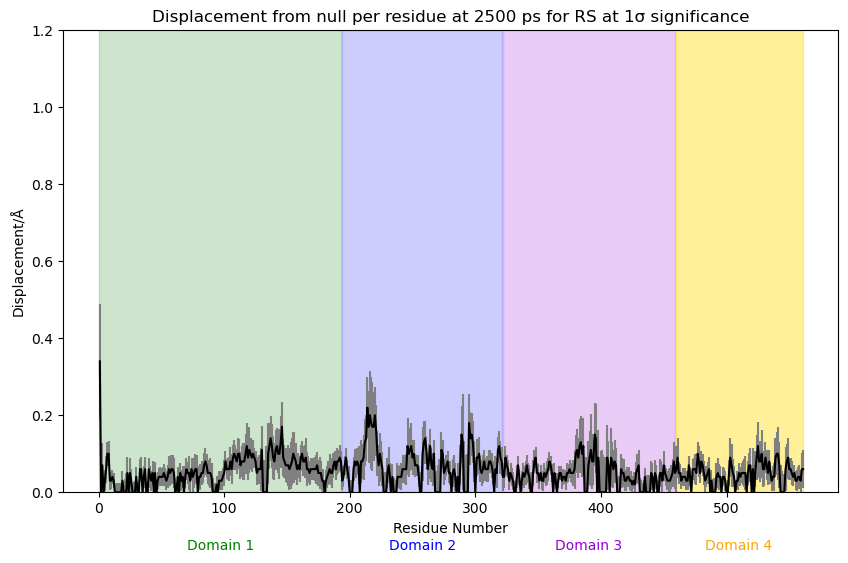

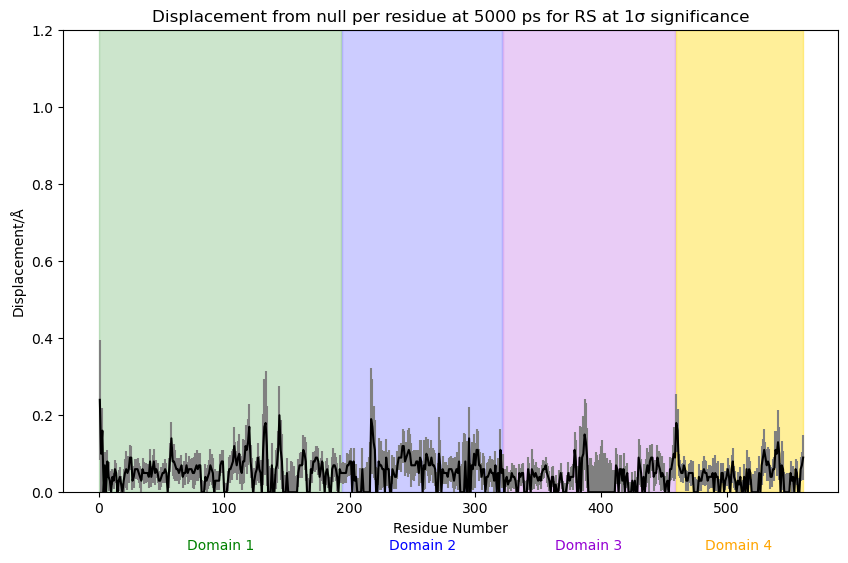

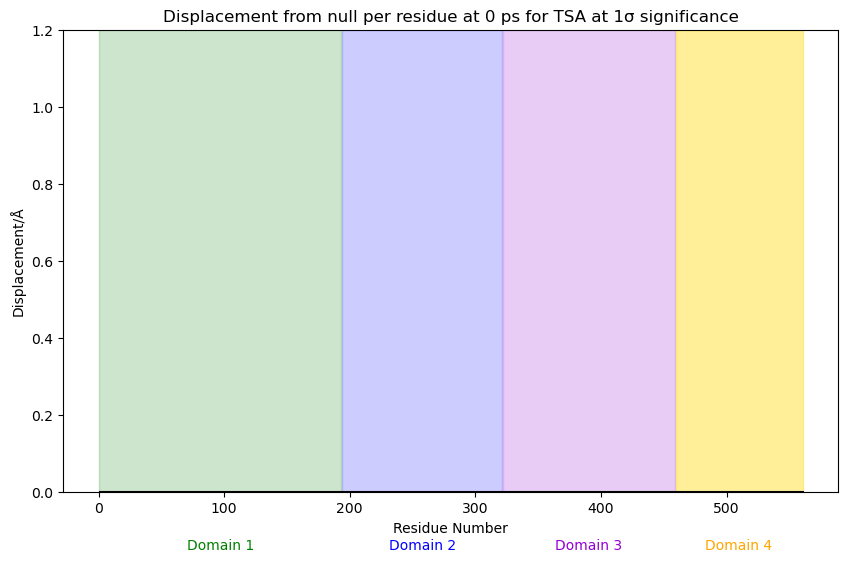

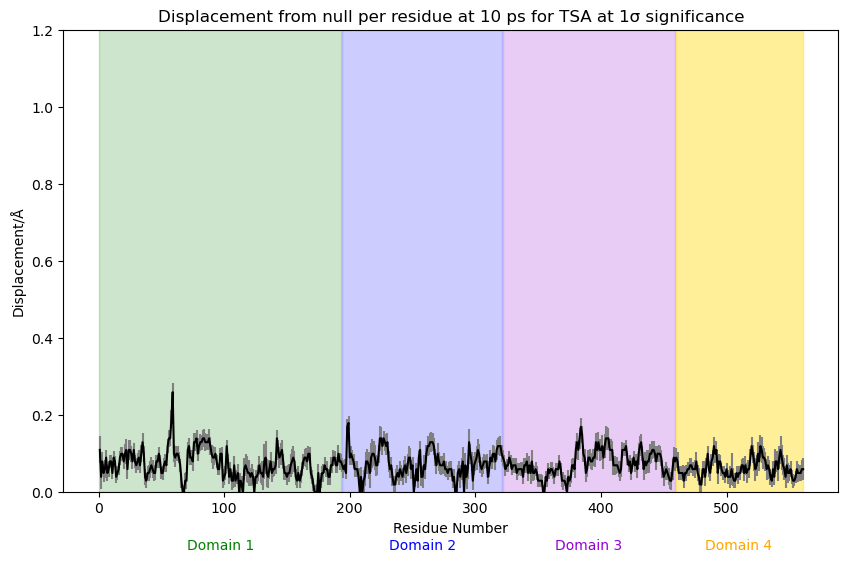

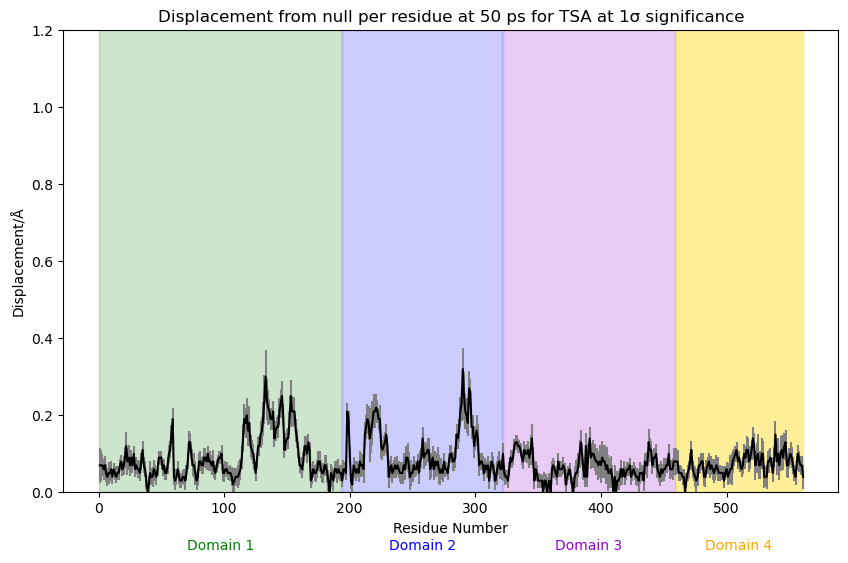

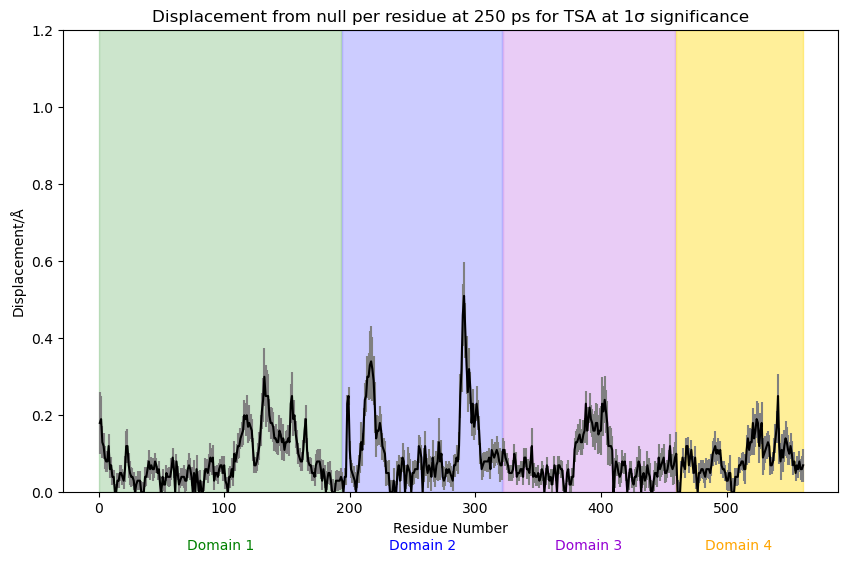

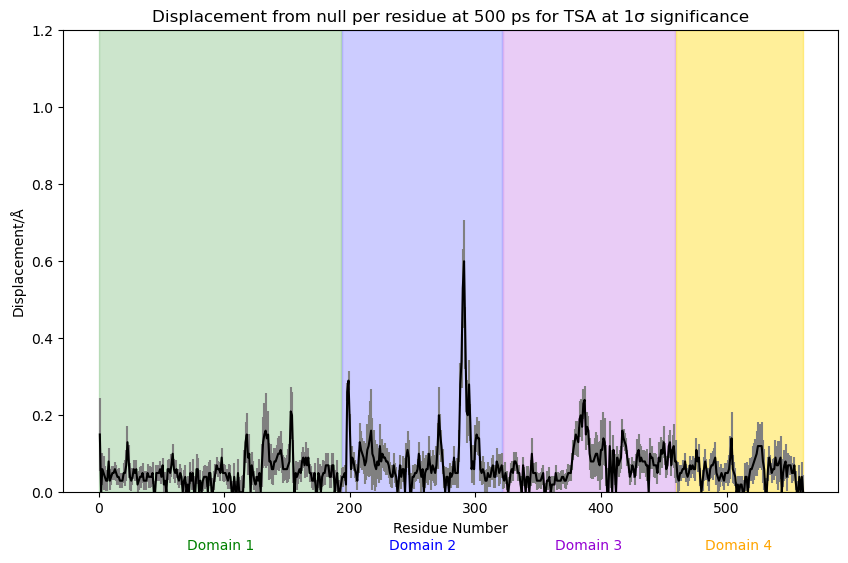

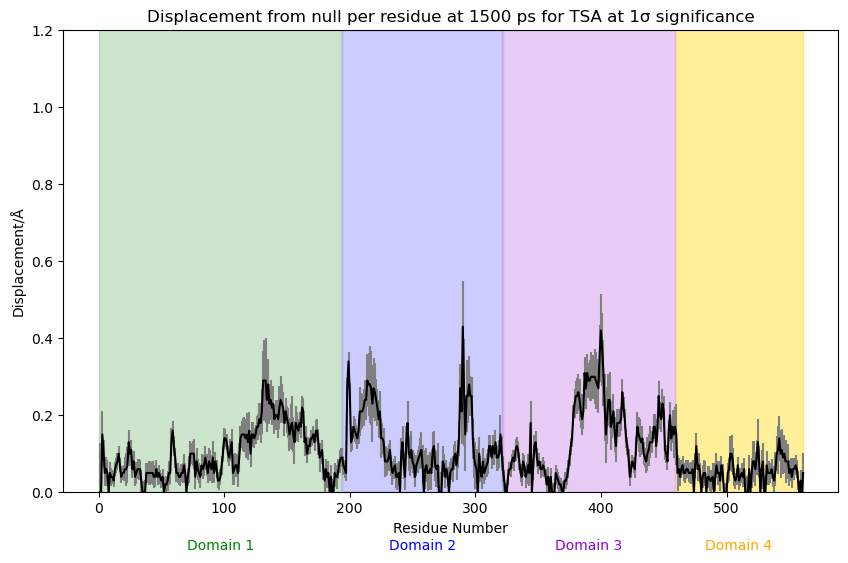

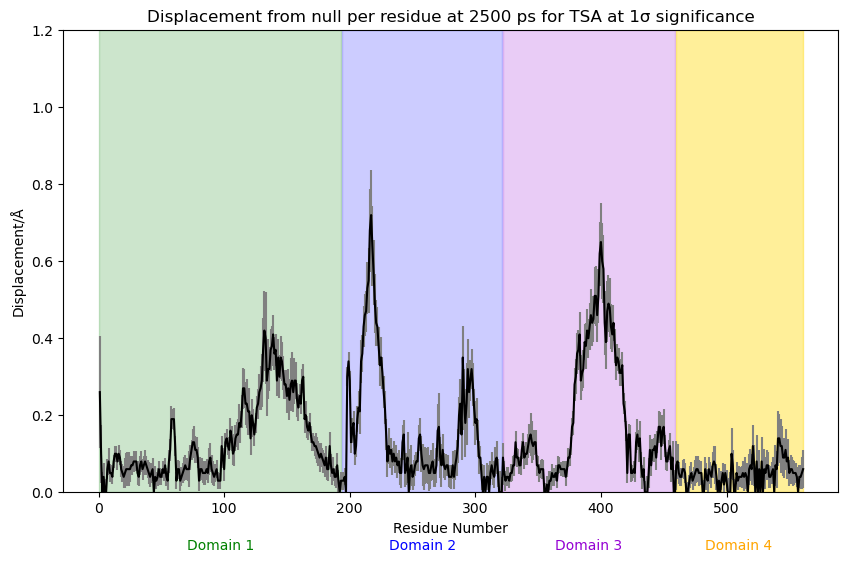

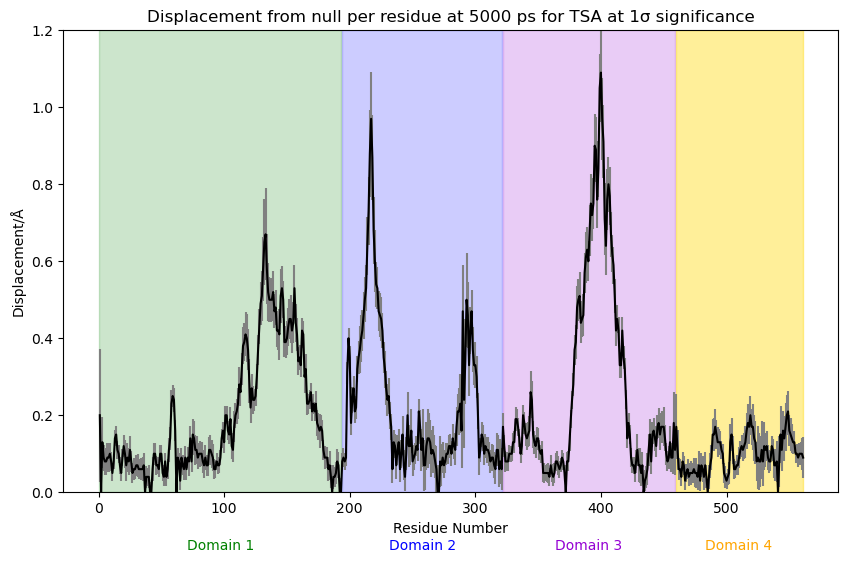

In [ ]:
# 1 sig null-dnemd individual plots
import matplotlib.pyplot as plt

STRUCTURE= ['RS','TSA']
TIME_STEPS =[0, 5, 25, 125, 250, 750, 1250, 2500]

def plot_b_factors(output_dir, error_file, file_range):
    plt.figure(figsize=(10, 6))
    
    for i in file_range:
        output_pdb = os.path.join(output_dir, f"vec_norm_1sig_{i}.pdb") 
        error_file = os.path.join(error_file, f"vec_norm_stats_1sig_new_{i}.txt") 
        residues = []
        b_factors = []
        errors = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith("ATOM") or line.startswith("HETATM"):
                    res_num = int(line[22:26])  # Extract residue number
                    b_factor = float(line[60:66])  # Extract B-factor
                    residues.append(res_num)
                    b_factors.append(b_factor)

        with open(error_file, 'r') as f:
            for line in f:
                if line.startswith(" "):
                    error_1s = float(line[80:87])
                    errors.append(error_1s)
        time_point= i*2   # Frame number times 2 as we saved every 2 ps
        # plt.plot(residues, b_factors, color = 'black', label=f"{time_point} ps")
        plt.errorbar(residues, b_factors, yerr=errors, fmt='-k', ecolor='grey', label=f"{time_point} ps")

    
    plt.xlabel("Residue Number")
    plt.ylabel("Displacement/Å")
    plt.ylim(0, 1.2)
    plt.title(f"Displacement from null per residue at {time_point} ps for {structure} at 1σ significance")
    plt.text(97, -0.15, 'Domain 1', ha='center', fontsize=10, color='green')
    plt.text(258, -0.15, 'Domain 2', ha='center', fontsize=10, color='blue')
    plt.text(390, -0.15, 'Domain 3', ha='center', fontsize=10, color='darkviolet')
    plt.text(510, -0.15, 'Domain 4', ha='center', fontsize=10, color='orange')
    plt.axvspan(0, 193, alpha=0.2, color='green')
    plt.axvspan(194, 321, alpha=0.2, color='blue')
    plt.axvspan(322, 459, alpha=0.2, color='darkviolet')
    plt.axvspan(460, 561, alpha=0.4, color='gold')
    # plt.legend()
    plt.show()

# ps_time_steps=[0, 2, 5, 7, 10, 12, 25, 50, 125, 150, 200, 250, 500, 750, 1000, 1250, 2500]

for structure in STRUCTURE:
    for time in TIME_STEPS:
        plot_b_factors(f"/user/work/zn22275/vec_space_{structure}", f"/user/work/zn22275/vec_space_{structure}/stats", {time})